# Desafio 2 - Agrupando os países usando o aprendizado não supervisionado para a HELP International

Realizar EDA, pré-processamento, agrupar utilizando as técnicas de agrupamento apresentadas na disciplina, analisar os grupos encontrados e selecionar 5 países que mais precisam de ajuda internacional.


Link do desafio do Kaggle: https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data

### Grupo de trabalho

1. João Freitas,
2. João Kruschewsky,
3. Vinícius Matos, 
4. Vito Magarão 

# Importação das Bibilotecas

In [543]:
#Importação das bibliotecas básicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib import cm

from yellowbrick.cluster import KElbowVisualizer # o negocio de visualizar o cotovelo

from scipy.cluster.hierarchy import dendrogram, linkage # H-clustering
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN  # DBSCAN

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_wine
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# bibliotecas para esconder os avisos do seaborn
import warnings
warnings.filterwarnings("ignore")
import textwrap 

In [544]:
# !pip install yellowbrick --upgrade

# Carregamento do dataset

In [545]:
# importando o datafram do git
df = pd.read_csv(r'https://raw.githubusercontent.com/MasterExecuson/Data-Science-Analytics/main/Data%20Analytics%20Hands%20On/Unsupervised%20Learning%20on%20Country%20Data/Country-data.csv')

In [546]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Backup do dataset

In [547]:
df_backup = df.copy()

## Checando o carregamento bem sucedido da base

In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [549]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [550]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


# Dicionário de Dados
Coleção de metadados que contém definições, informações e representações de elementos de dados

## Descrição dos atributos e dos tipos de dados

country: Nome do país (nominal)

child_mort: Número de mortes de crianças com menos de 5 anos por 1000 nascimentos

exports: Exportação de bens e serviços per capita em porcentagem

health: Total de gastos com saúde per capita em porcentagem

imports: Importação de bens e serviços per capita em porcentagem

Income: Receita líquida por pessoa

Inflation: A medida do índice de crescimento anual do PIB

life_expec: O número médio de anos que uma criança recém-nascida viveria se os atuais padrões de mortalidade permanecessem os mesmos

total_fer: O número de filhos que nasceriam de cada mulher se as atuais taxas de fertilidade por idade permanecessem as mesmas.

gdpp: O PIB per capita. Calculado como o PIB total dividido pela população total.

# Análise preliminar do dataset

In [551]:
df.shape

(167, 10)

In [552]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


A primeira vista não são visiveis dados faltantes
Para a coluna 'child_mort' podemos ver que a média está muito distante do segundo quartil, sinalizando que há um desvio para direita, assim como as colunas 'income' e 'gdpp'.

Considerando as informações presentes no dataset, esses desvios são justificados pela distância de indicadores sócio-econômicos entre países de primeiro e terceiro mundo

Todas as colunas precisam ser normalizadas, já que iremos realizar o agrupamento dos dados.
É notado que a maioria das variáveis tem um desvio padrão alto.

## Exibição dos valores únicos por coluna

In [553]:
for column_name in df.columns:
    if df[column_name].dtype == 'float':
        # Conversão da coluna para float antes da aproximação para lidar com variáveis não integrais
        float_column = df[column_name].astype(float)
        if float_column.nunique() == 1:
            # Se todos os valores forem os mesmos, printar como int
            print('{}: {}'.format(column_name, int(float_column.iloc[0])))
        else:
            # Se não, printar floats únicos com 3 decimais
            unique_values = float_column.unique()
            formatted_values = [ '{:.3f}'.format(unique_value) for unique_value in unique_values ]
            formatted_string = ', '.join(formatted_values)
            print('{}: {}'.format(column_name, formatted_string))
    else:
        unique_values = df[column_name].unique()
        formatted_values = [ str(value) for value in unique_values ]
        formatted_string = ', '.join(formatted_values)
        print('{}: {}'.format(column_name, formatted_string))
    print('----------')

country: Afghanistan, Albania, Algeria, Angola, Antigua and Barbuda, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Belgium, Belize, Benin, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Brunei, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Cape Verde, Central African Republic, Chad, Chile, China, Colombia, Comoros, Congo, Dem. Rep., Congo, Rep., Costa Rica, Cote d'Ivoire, Croatia, Cyprus, Czech Republic, Denmark, Dominican Republic, Ecuador, Egypt, El Salvador, Equatorial Guinea, Eritrea, Estonia, Fiji, Finland, France, Gabon, Gambia, Georgia, Germany, Ghana, Greece, Grenada, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, Hungary, Iceland, India, Indonesia, Iran, Iraq, Ireland, Israel, Italy, Jamaica, Japan, Jordan, Kazakhstan, Kenya, Kiribati, Kuwait, Kyrgyz Republic, Lao, Latvia, Lebanon, Lesotho, Liberia, Libya, Lithuania, Luxembourg, Macedonia, FYR, Madagascar, Malawi, Malaysia, Maldives, Mali, Malt

In [554]:
df.duplicated().sum()

0

# Análise Univariada

### Funções

In [555]:
def describeColumn (df,col_index,unique=False):
    col_name = str(df.columns[col_index])
    print('Coluna ' + col_name + ":")
    print( '\nDados estatísticos: \n')
    print(df[col_name].describe())
    if(unique):
        print( '\n\nValores de Entradas Únicos: ')
        print( df[col_name].unique())
    else:
        print('\n ---------- Column Count ----------- ')
        print('\n')
        col_view_grouped = df[col_name].groupby(df[col_name]).count().sort_values(ascending = False)
        print(col_view_grouped)
        print('\n ------------ Percentage ------------- ')
        print('\n')
        col_view_grouped_percentage = df[col_name].groupby(df[col_name]).count().sort_values(ascending = False)*100/len(df[col_name])
        print(col_view_grouped_percentage)
    return

def generateNumericBoxPlotAndHist(df:pd.DataFrame):
    df1 = df.select_dtypes([int, float])
    numeric_variables_graphs =  {}
    plt.figure(figsize=(80, 60), dpi=80)
    for i, column in enumerate(df1.columns):
        fig, ax = plt.subplots(1,2,figsize=(18, 6))
        sns.histplot(ax=ax[0],data=df1, x=column).set(title = "Histplot of " + column)
        sns.boxplot(x=df1[column]).set(title = "Boxplot of " + column)
        numeric_variables_graphs[column] = fig
    return numeric_variables_graphs,df1.columns

def silhouette(df_scaled, df_kmeans):
  # find cluster labels and number of clusters
  cluster_labels = np.unique(df_kmeans)
  n_clusters = cluster_labels.shape[0]

  # calculate silhouettes
  silhouette_vals = silhouette_samples(df_scaled, df_kmeans, metric='euclidean')

  # plot silhouette
  fig, ax = plt.subplots()
  y_ax_lower, y_ax_upper = 0, 0
  yticks = []
  for i, c in enumerate(cluster_labels):
      c_silhouette_vals = silhouette_vals[df_kmeans == c]
      c_silhouette_vals.sort()
      y_ax_upper += len(c_silhouette_vals)
      color = cm.jet(float(i) / n_clusters)
      ax.barh(
          range(y_ax_lower, y_ax_upper),
          c_silhouette_vals, 
          height=1.0, edgecolor='none',
          color=color
      )
      yticks.append((y_ax_lower + y_ax_upper) / 2.)
      y_ax_lower += len(c_silhouette_vals)

  # calculate silhouette score    
  silhouette_avg = np.mean(silhouette_vals)

  ax.axvline(silhouette_avg, color="red", linestyle="--") 
  ax.set_yticks(yticks, cluster_labels + 1)
  ax.set_ylabel('Cluster')
  ax.set_xlabel('Silhouette coefficient')
  ax.plot()


def plot_hclust(df, df_hc):
  # plot
  plt.figure(figsize=(10, 10))
  plt.scatter(
      df[df_hc == 0, 0], df[df_hc == 0, 1],
      s=50, c='lightgreen',
      marker='s', edgecolor='black',
      label='cluster 1'
  )
  plt.scatter(
      df[df_hc == 1, 0], df[df_hc == 1, 1],
      s=50, c='orange',
      marker='o', edgecolor='black',
      label='cluster 2'
  )
  plt.scatter(
      df[df_hc == 2, 0], df[df_hc == 2, 1],
      s=50, c='lightblue',
      marker='v', edgecolor='black',
      label='cluster 3'
  )
  plt.scatter(
      df[df_hc == 3, 0], df[df_hc == 3, 1],
      s=50, c='lightcoral',
      marker='D', edgecolor='black',
      label='cluster 4'
  )
  plt.legend(scatterpoints=1)
  plt.grid()
  plt.show()  


def plot_histogram_hclust(df,n_clusters, linkage):
    ac = AgglomerativeClustering(
            n_clusters=n_clusters, affinity='euclidean', linkage=linkage
    )
    df_hc = ac.fit_predict(df)
    plot_hclust(np.array(df), df_hc)





<Figure size 6400x4800 with 0 Axes>

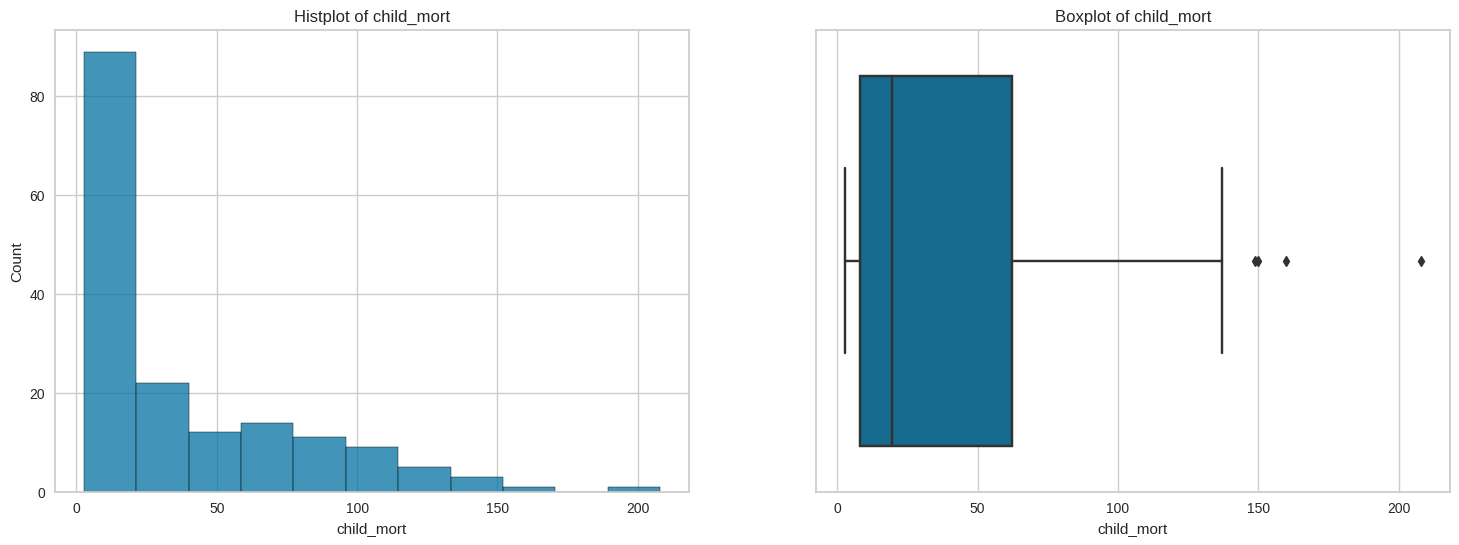

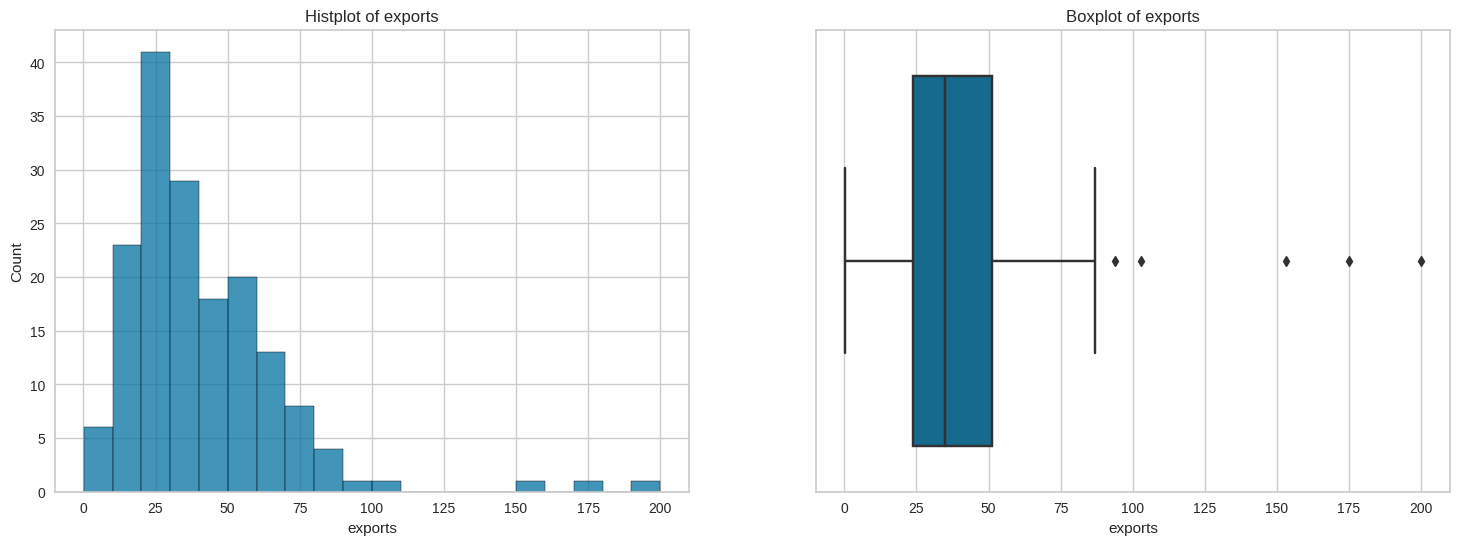

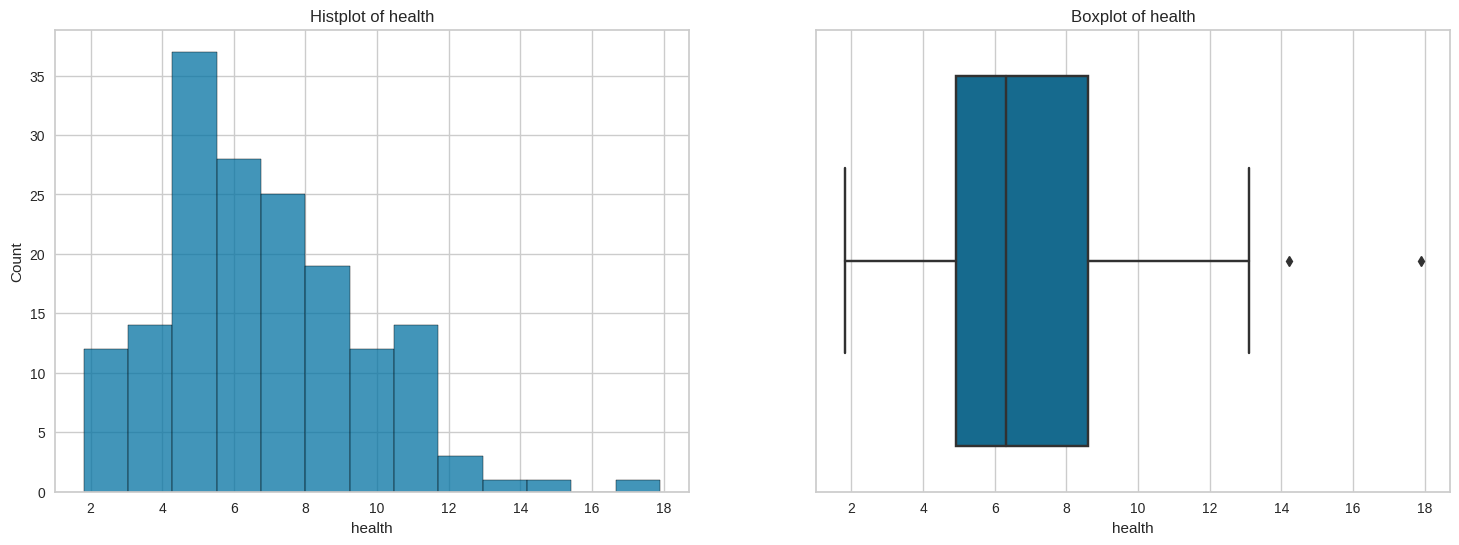

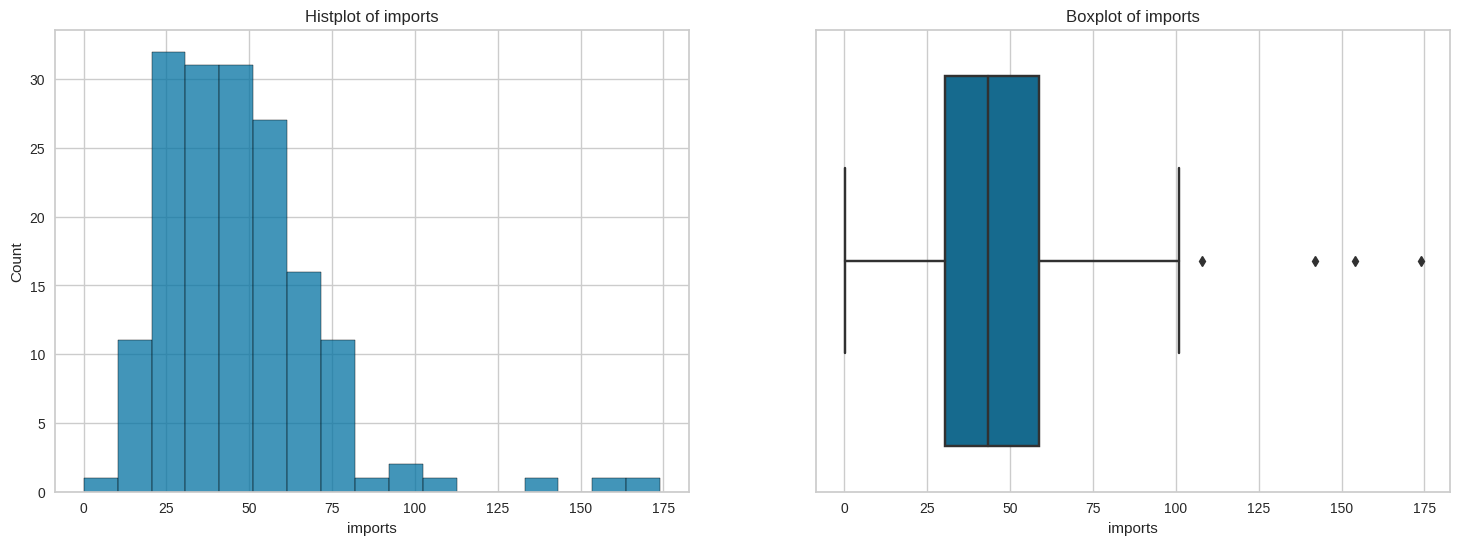

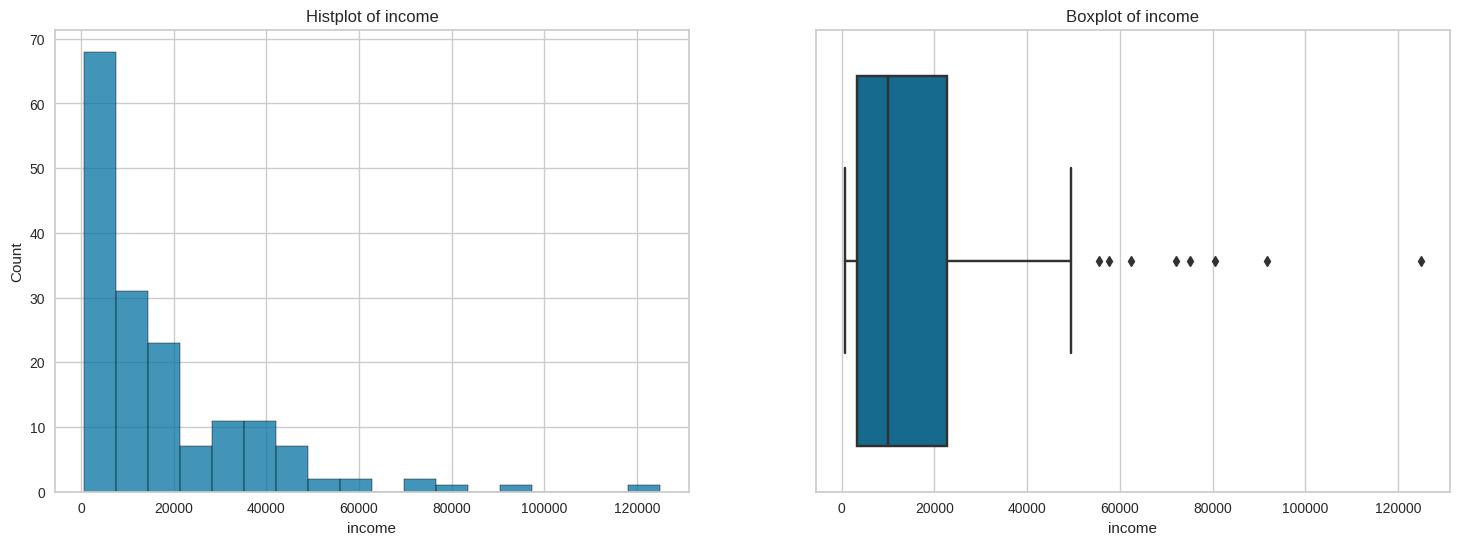

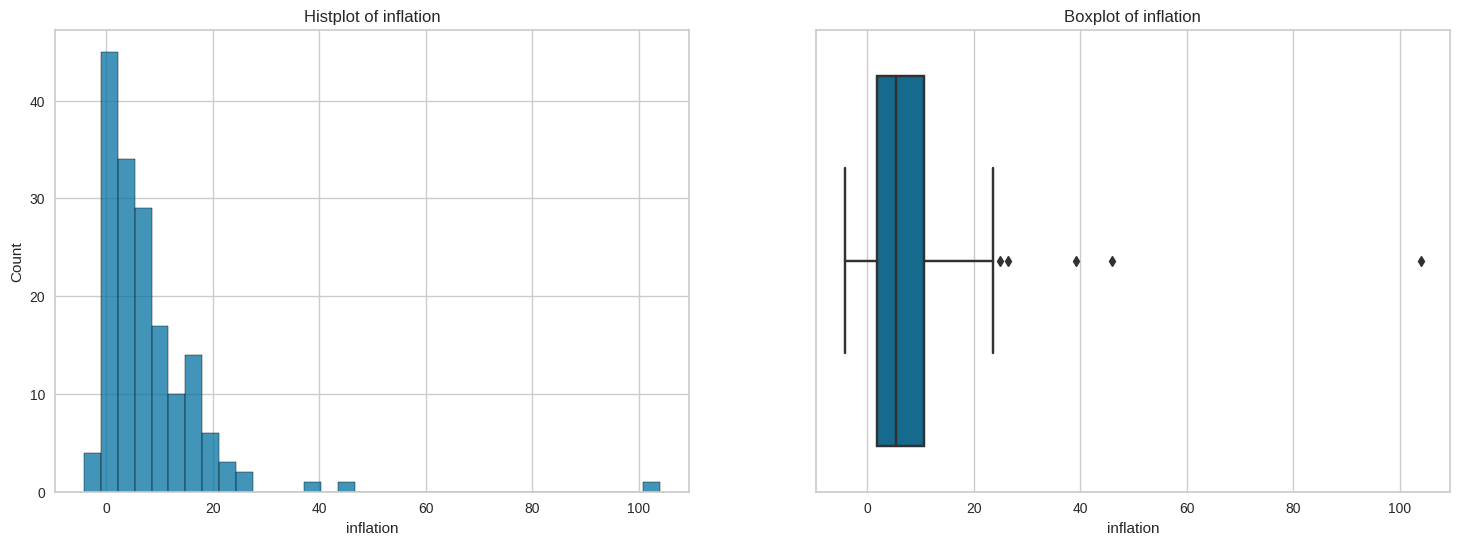

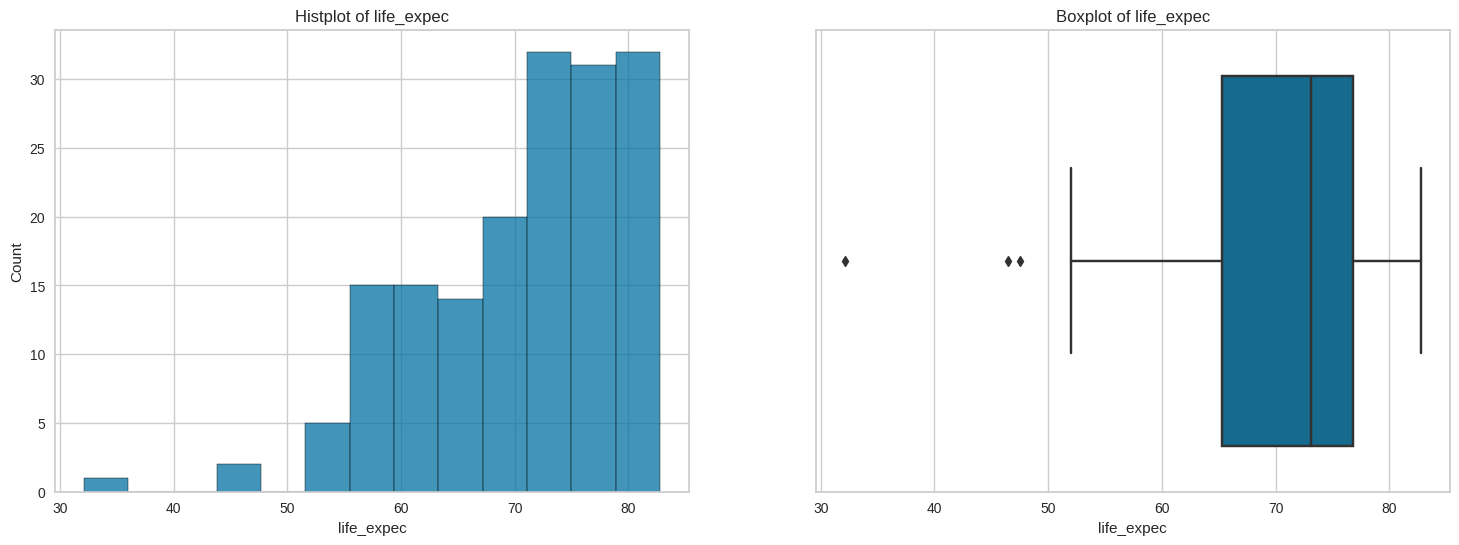

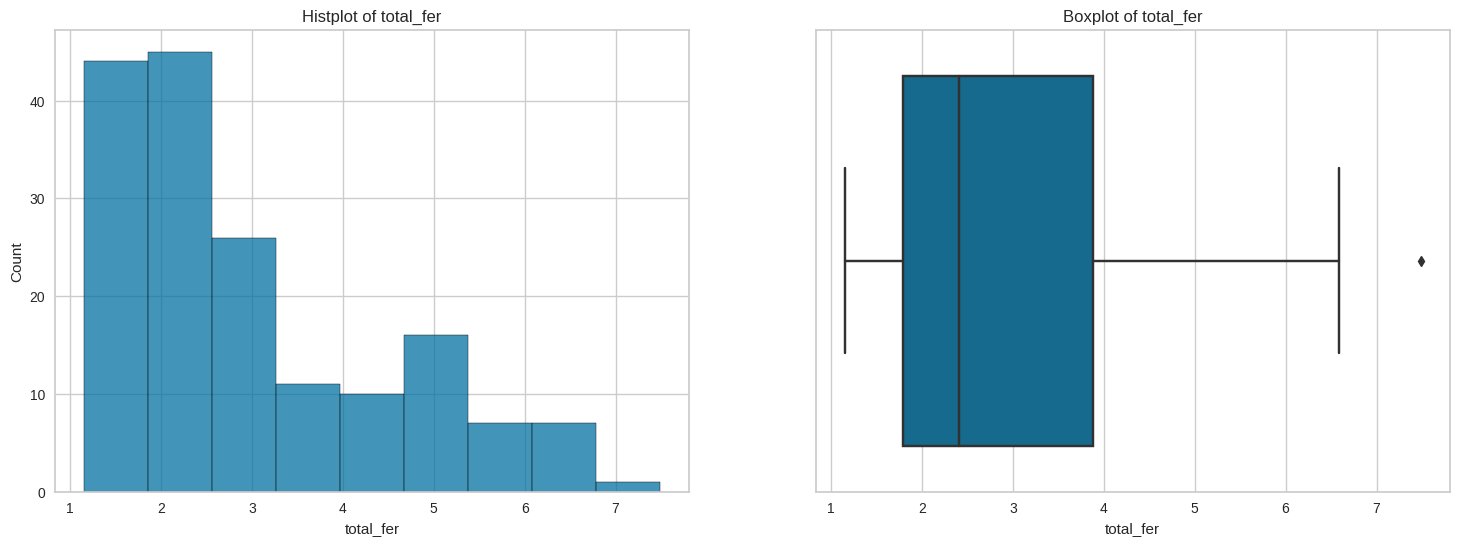

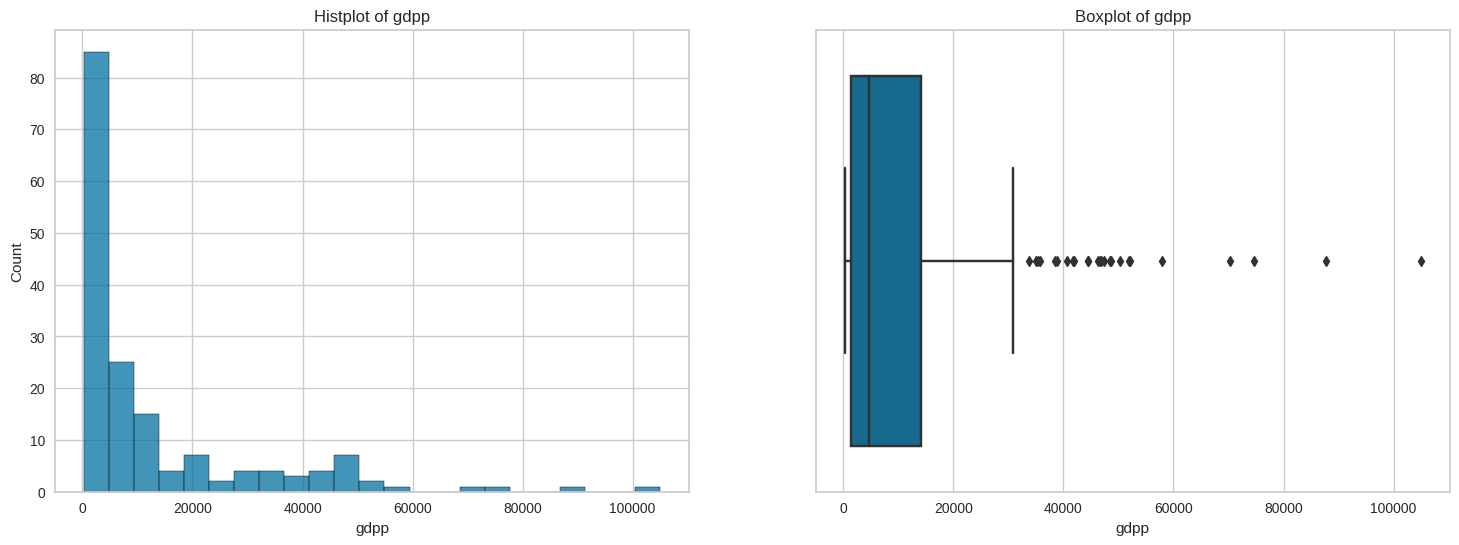

In [556]:
graphs,columns=generateNumericBoxPlotAndHist(df)

## child_mort

Coluna child_mort:

Dados estatísticos: 

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: float64

 ---------- Column Count ----------- 


child_mort
4.5      4
24.1     3
3.2      3
111.0    3
4.2      3
        ..
16.5     1
15.0     1
14.9     1
14.6     1
208.0    1
Name: child_mort, Length: 139, dtype: int64

 ------------ Percentage ------------- 


child_mort
4.5      2.395210
24.1     1.796407
3.2      1.796407
111.0    1.796407
4.2      1.796407
           ...   
16.5     0.598802
15.0     0.598802
14.9     0.598802
14.6     0.598802
208.0    0.598802
Name: child_mort, Length: 139, dtype: float64


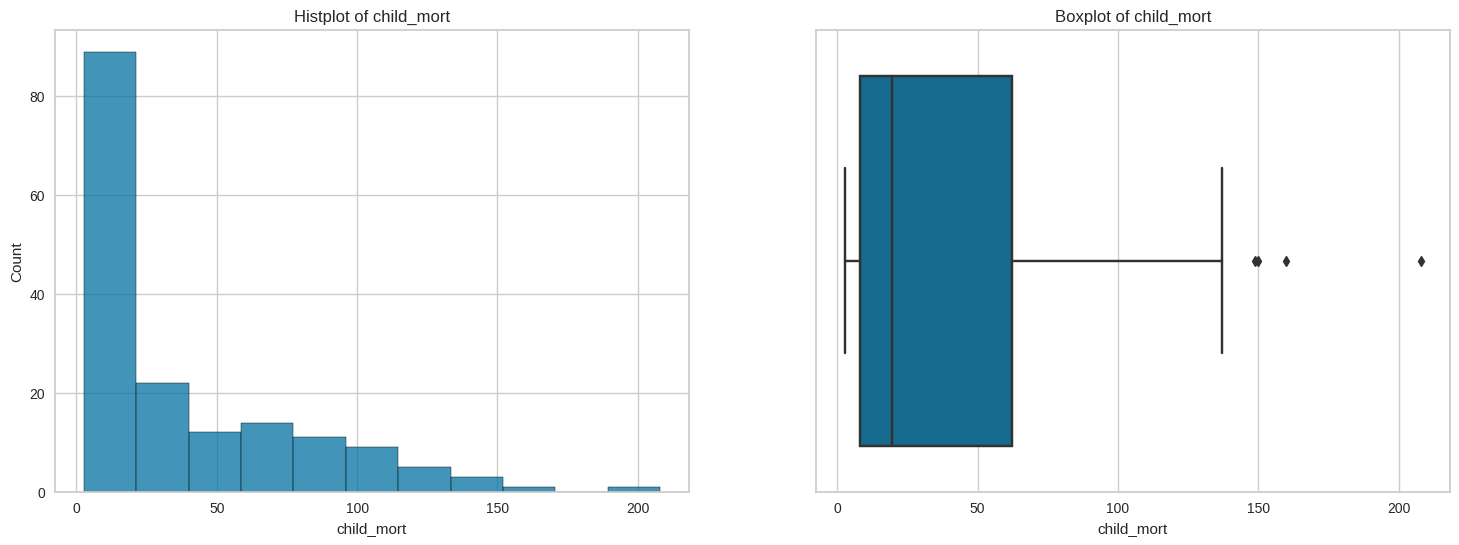

In [557]:
    i=0
    describeColumn(df,i+1)
    graphs[columns[i]]

In [558]:
df[df['child_mort'] >=140]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399


In [559]:
df[df['child_mort'] <=3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100


Os outliers são países de terceiro mundo, sendo 3 do continente africano e um do centro-americano. O indicador de mortalidade infantil é usado para medir qualidade de vida e desenvolvimento, por expressar a situação de saúde de uma comunidade e as desigualdades de saúde entre grupos sociais e regiões[¹](https://unasus2.moodle.ufsc.br/pluginfile.php/33455/mod_resource/content/1/un2/top2_5.html). 

## exports

Coluna exports:

Dados estatísticos: 

count    167.000000
mean      41.108976
std       27.412010
min        0.109000
25%       23.800000
50%       35.000000
75%       51.350000
max      200.000000
Name: exports, dtype: float64

 ---------- Column Count ----------- 


exports
23.8     3
35.0     3
30.3     2
76.3     2
26.3     2
        ..
25.5     1
25.3     1
25.2     1
25.0     1
200.0    1
Name: exports, Length: 147, dtype: int64

 ------------ Percentage ------------- 


exports
23.8     1.796407
35.0     1.796407
30.3     1.197605
76.3     1.197605
26.3     1.197605
           ...   
25.5     0.598802
25.3     0.598802
25.2     0.598802
25.0     0.598802
200.0    0.598802
Name: exports, Length: 147, dtype: float64


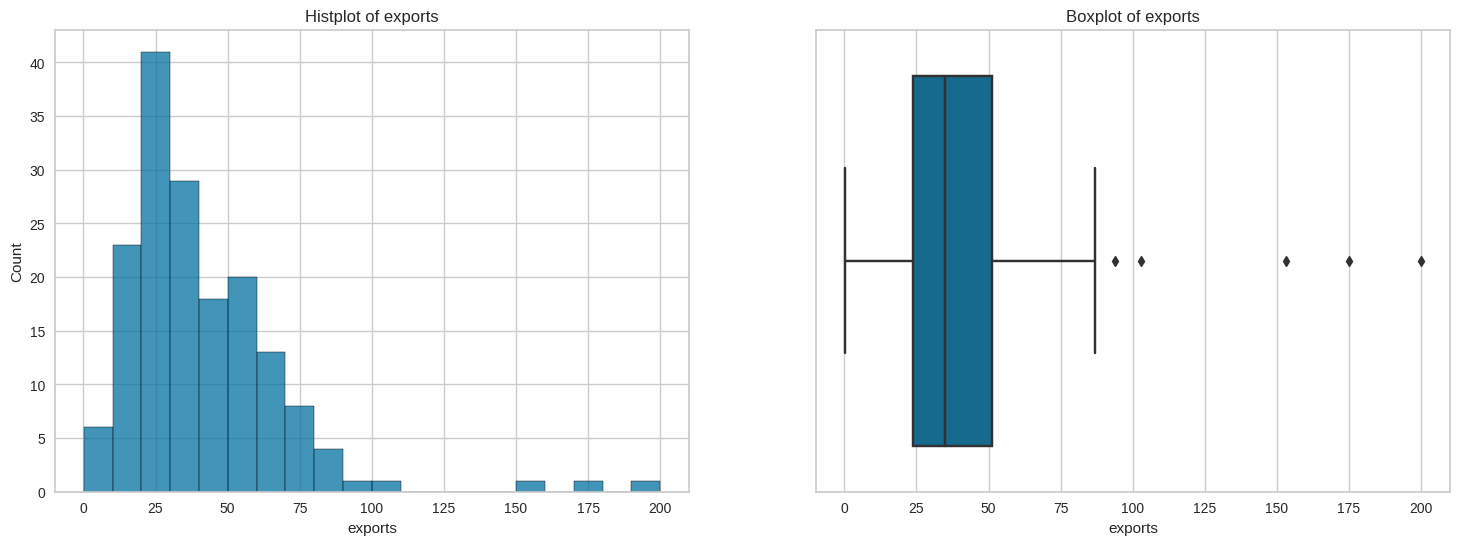

In [560]:
    i=1
    describeColumn(df,i+1)
    graphs[columns[i]]

In [561]:
df[df['exports'] >=93]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


Os outliers são países desenvolvidos com exceção de Seychelles, um país insular da África que é o primeiro e único país africano com IDH considerado muito alto, além de ter uma das maiores renda per capita da África[²](https://hdr.undp.org/system/files/documents/global-report-document/hdr2021-22overviewptpdf.pdf). Apesar disso, o país possuí uma desigualdade muito grande e portanto esse indicador não deve ser analisado fora do contexto[³](https://pt.knoema.com/atlas/Seicheles/topics/Pobreza/Ingressos-dos-piores-remunerados-da-popula%c3%a7%c3%a3o/%c3%8dndice-GINI).

##health

Coluna health:

Dados estatísticos: 

count    167.000000
mean       6.815689
std        2.746837
min        1.810000
25%        4.920000
50%        6.320000
75%        8.600000
max       17.900000
Name: health, dtype: float64

 ---------- Column Count ----------- 


health
5.07     3
5.20     3
6.74     2
11.00    2
8.10     2
        ..
5.16     1
5.13     1
4.98     1
4.97     1
17.90    1
Name: health, Length: 147, dtype: int64

 ------------ Percentage ------------- 


health
5.07     1.796407
5.20     1.796407
6.74     1.197605
11.00    1.197605
8.10     1.197605
           ...   
5.16     0.598802
5.13     0.598802
4.98     0.598802
4.97     0.598802
17.90    0.598802
Name: health, Length: 147, dtype: float64


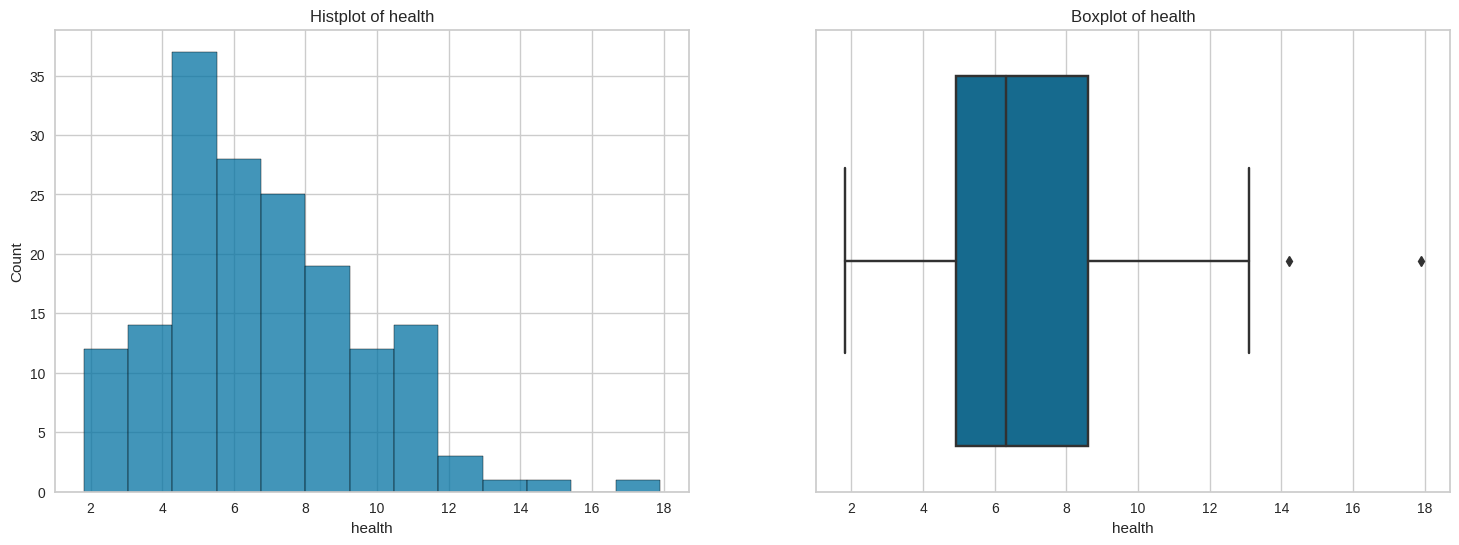

In [562]:
    i=2
    describeColumn(df,i+1)
    graphs[columns[i]]

In [563]:
df[df['health'] >=14]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
101,"Micronesia, Fed. Sts.",40.0,23.5,14.2,81.0,3340,3.80,65.4,3.46,2860
159,United States,7.3,12.4,17.9,15.8,49400,1.22,78.7,1.93,48400


A variável tem poucos outliers e não permite análises maiores com a interpretação dos gráficos acima.

## imports

Coluna imports:

Dados estatísticos: 

count    167.000000
mean      46.890215
std       24.209589
min        0.065900
25%       30.200000
50%       43.300000
75%       58.750000
max      174.000000
Name: imports, dtype: float64

 ---------- Column Count ----------- 


imports
43.3     2
49.6     2
57.5     2
62.9     2
63.6     2
        ..
34.9     1
35.0     1
35.1     1
35.2     1
174.0    1
Name: imports, Length: 151, dtype: int64

 ------------ Percentage ------------- 


imports
43.3     1.197605
49.6     1.197605
57.5     1.197605
62.9     1.197605
63.6     1.197605
           ...   
34.9     0.598802
35.0     0.598802
35.1     0.598802
35.2     0.598802
174.0    0.598802
Name: imports, Length: 151, dtype: float64


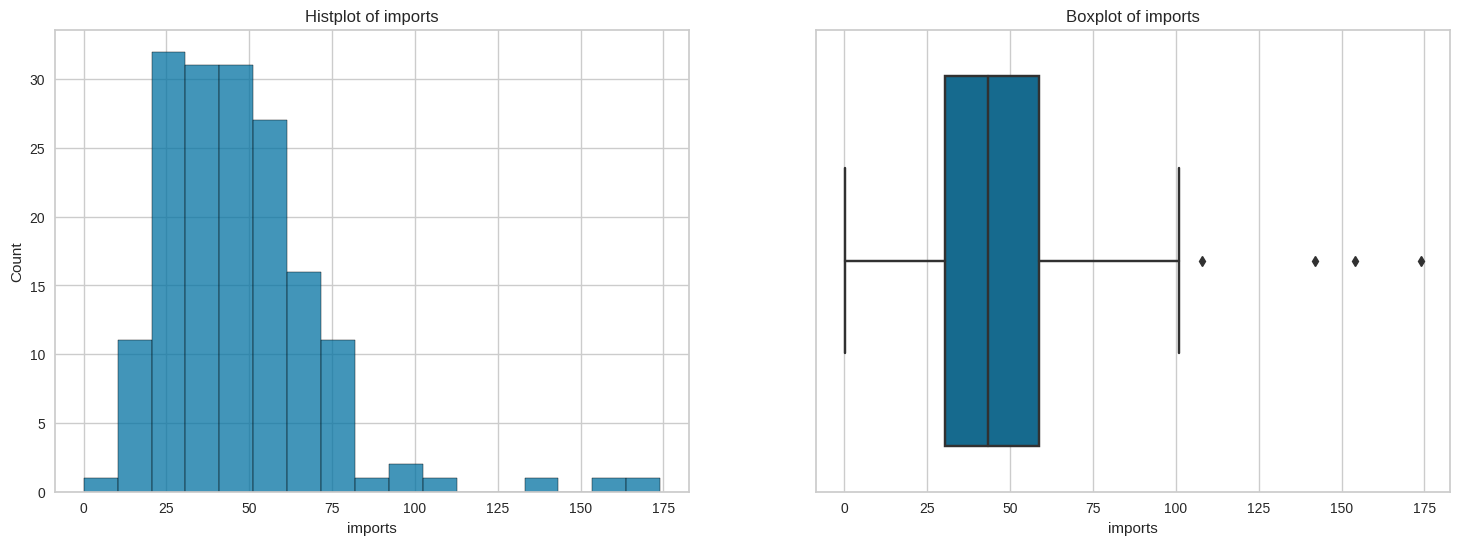

In [564]:
    i=3
    describeColumn(df,i+1)
    graphs[columns[i]]

In [565]:
df[df['imports'] >=102]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


A variável 'imports' tem os mesmos outliers da 'exports', com exceção da Irlanda, entretando apresenta um pouco menos de balanceamento com uma alta concentração dos dados próximos à media e ao segundo quartil.

## income

Coluna income:

Dados estatísticos: 

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
max      125000.000000
Name: income, dtype: float64

 ---------- Column Count ----------- 


income
15300     2
28300     2
21100     2
36200     2
41100     2
         ..
5400      1
5410      1
5600      1
5830      1
125000    1
Name: income, Length: 156, dtype: int64

 ------------ Percentage ------------- 


income
15300     1.197605
28300     1.197605
21100     1.197605
36200     1.197605
41100     1.197605
            ...   
5400      0.598802
5410      0.598802
5600      0.598802
5830      0.598802
125000    0.598802
Name: income, Length: 156, dtype: float64


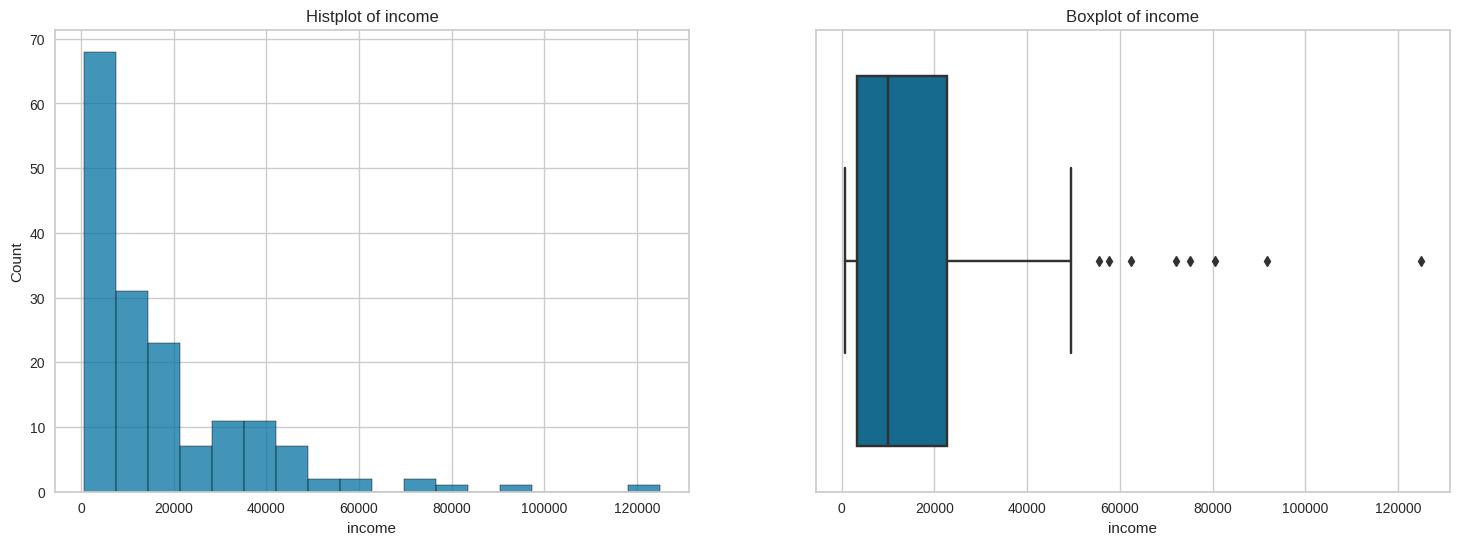

In [566]:
    i=4
    describeColumn(df,i+1)
    graphs[columns[i]]

In [567]:
df[df['income'] >=70000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


É possível perceber que os 5 países com maior income tem sua economia relacionada de alguma forma com a extração e refino de petróleo. Entretanto, o gráfico demonstra uma alta disparidade de receita onde a maioria dos países (75% do dataset) estão abaixo da faixa de  $22800 anuais per capita.

## inflation

Coluna inflation:

Dados estatísticos: 

count    167.000000
mean       7.781832
std       10.570704
min       -4.210000
25%        1.810000
50%        5.390000
75%       10.750000
max      104.000000
Name: inflation, dtype: float64

 ---------- Column Count ----------- 


inflation
16.60     3
15.10     2
2.01      2
5.47      2
16.10     2
         ..
2.61      1
2.62      1
2.65      1
2.87      1
104.00    1
Name: inflation, Length: 156, dtype: int64

 ------------ Percentage ------------- 


inflation
16.60     1.796407
15.10     1.197605
2.01      1.197605
5.47      1.197605
16.10     1.197605
            ...   
2.61      0.598802
2.62      0.598802
2.65      0.598802
2.87      0.598802
104.00    0.598802
Name: inflation, Length: 156, dtype: float64


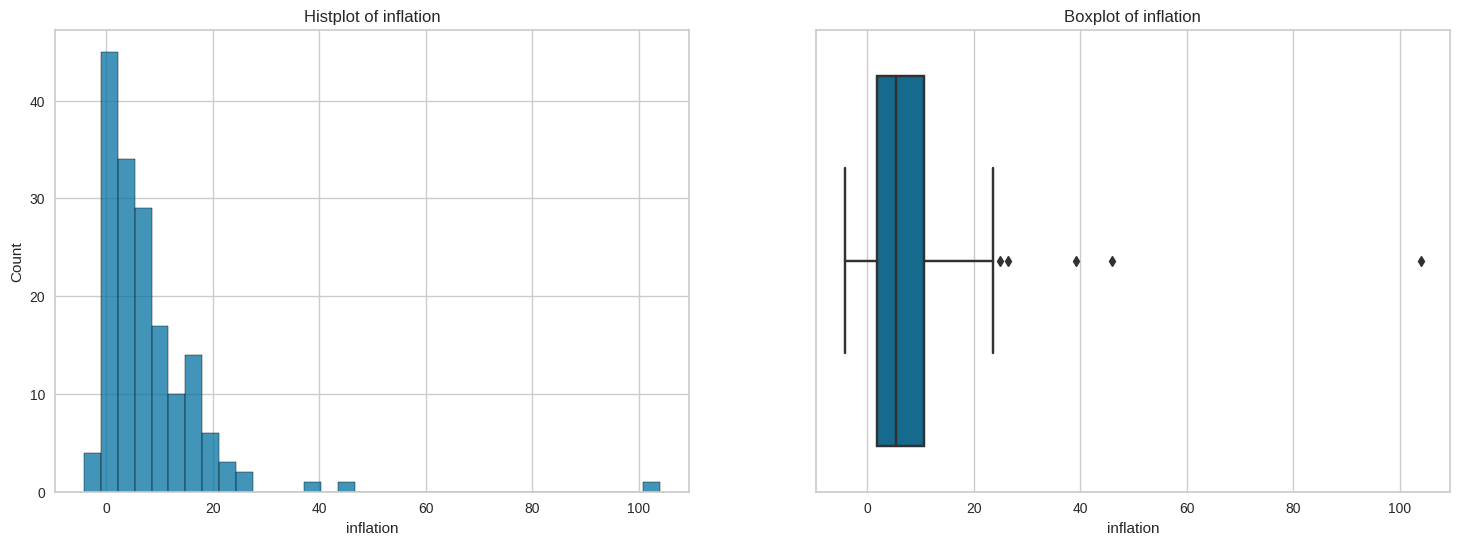

In [568]:
    i=5
    describeColumn(df,i+1)
    graphs[columns[i]]

In [569]:
df[df['inflation'] >=24]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.5,71.1,6.23,3600
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500


Os outliers representam países de diferentes regiões do planeta, todos de terceiro mundo.

## life_expec

Coluna life_expec:

Dados estatísticos: 

count    167.000000
mean      70.555689
std        8.893172
min       32.100000
25%       65.300000
50%       73.100000
75%       76.800000
max       82.800000
Name: life_expec, dtype: float64

 ---------- Column Count ----------- 


life_expec
76.4    3
79.5    3
74.5    3
70.4    3
76.3    3
       ..
64.0    1
63.8    1
63.0    1
62.9    1
82.8    1
Name: life_expec, Length: 127, dtype: int64

 ------------ Percentage ------------- 


life_expec
76.4    1.796407
79.5    1.796407
74.5    1.796407
70.4    1.796407
76.3    1.796407
          ...   
64.0    0.598802
63.8    0.598802
63.0    0.598802
62.9    0.598802
82.8    0.598802
Name: life_expec, Length: 127, dtype: float64


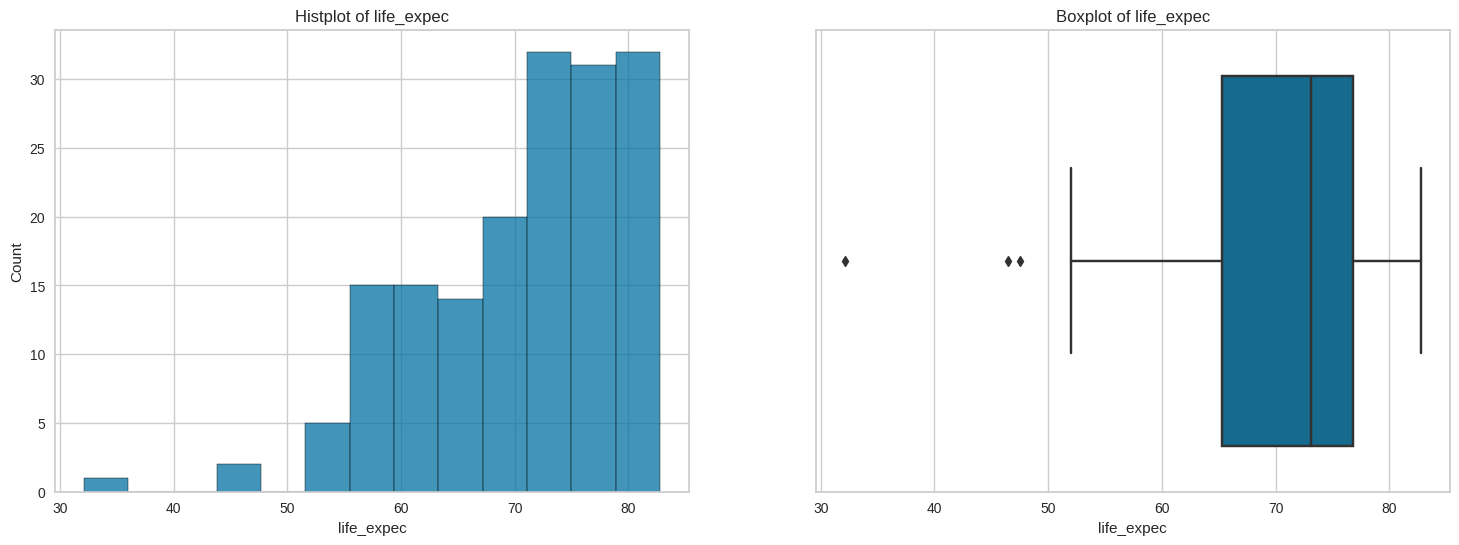

In [570]:
    i=6
    describeColumn(df,i+1)
    graphs[columns[i]]

In [571]:
df[df['life_expec'] <=50]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170


A variável 'life_expec' não possui uma curva normal, onde os dados se concentram entre a faixa de 70 a 85 anos. Considerando o indicador de expectativa de vida, esse fato pode ser explicado pelo comportamento do crescimento da expectativa, onde o crescimento da longevidade tende a diminuir conforme o aumento dos componentes que integram o índice de expectativa.

Além disso, dois dos três países outliers vivem uma crise sanitária e o Haiti está passando por crises humanitárias e desastres naturais.


## total_fer

Coluna total_fer:

Dados estatísticos: 

count    167.000000
mean       2.947964
std        1.513848
min        1.150000
25%        1.795000
50%        2.410000
75%        3.880000
max        7.490000
Name: total_fer, dtype: float64

 ---------- Column Count ----------- 


total_fer
1.92    4
1.57    4
1.39    3
2.17    3
1.87    3
       ..
2.16    1
2.14    1
2.13    1
2.08    1
7.49    1
Name: total_fer, Length: 138, dtype: int64

 ------------ Percentage ------------- 


total_fer
1.92    2.395210
1.57    2.395210
1.39    1.796407
2.17    1.796407
1.87    1.796407
          ...   
2.16    0.598802
2.14    0.598802
2.13    0.598802
2.08    0.598802
7.49    0.598802
Name: total_fer, Length: 138, dtype: float64


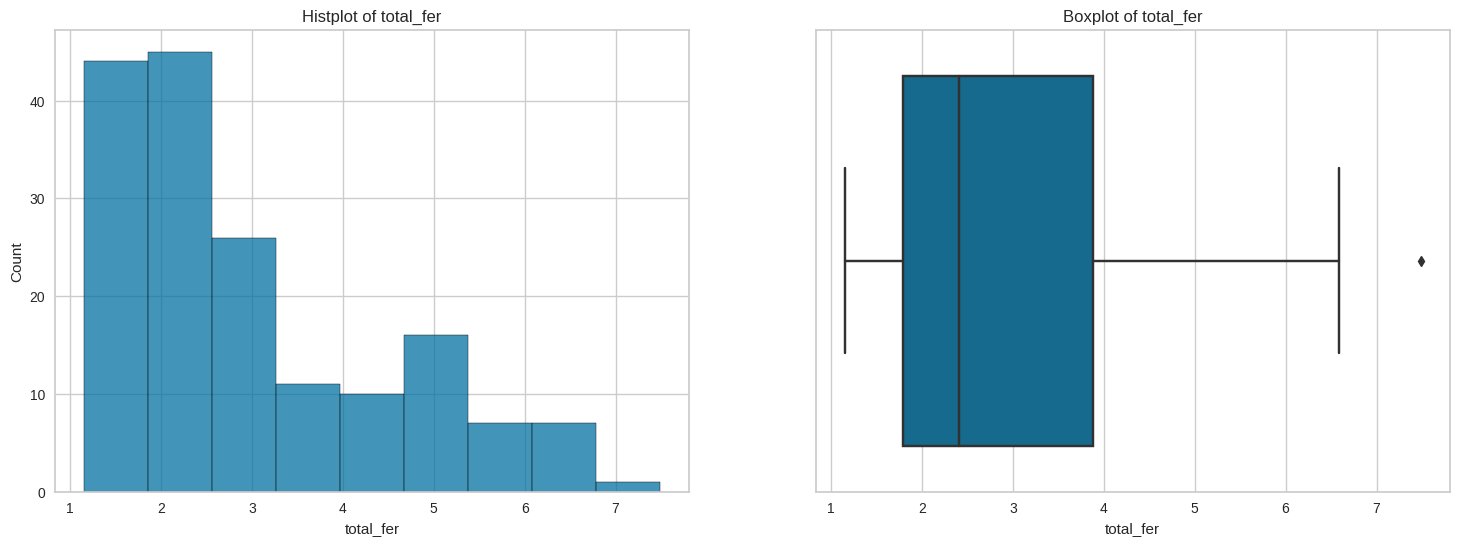

In [572]:
    i=7
    describeColumn(df,i+1)
    graphs[columns[i]]

In [573]:
df[df['total_fer'] >=5]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
40,Cote d'Ivoire,111.0,50.60,5.30,43.3,2690,5.390,56.3,5.27,1220


Os países com índice 'total_fer' acima de 5 são países do continente africano ou asiático

## gdpp

Coluna gdpp:

Dados estatísticos: 

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
max      105000.000000
Name: gdpp, dtype: float64

 ---------- Column Count ----------- 


gdpp
1310      4
2830      2
19300     2
13500     2
758       2
         ..
2990      1
3040      1
3110      1
3220      1
105000    1
Name: gdpp, Length: 157, dtype: int64

 ------------ Percentage ------------- 


gdpp
1310      2.395210
2830      1.197605
19300     1.197605
13500     1.197605
758       1.197605
            ...   
2990      0.598802
3040      0.598802
3110      0.598802
3220      0.598802
105000    0.598802
Name: gdpp, Length: 157, dtype: float64


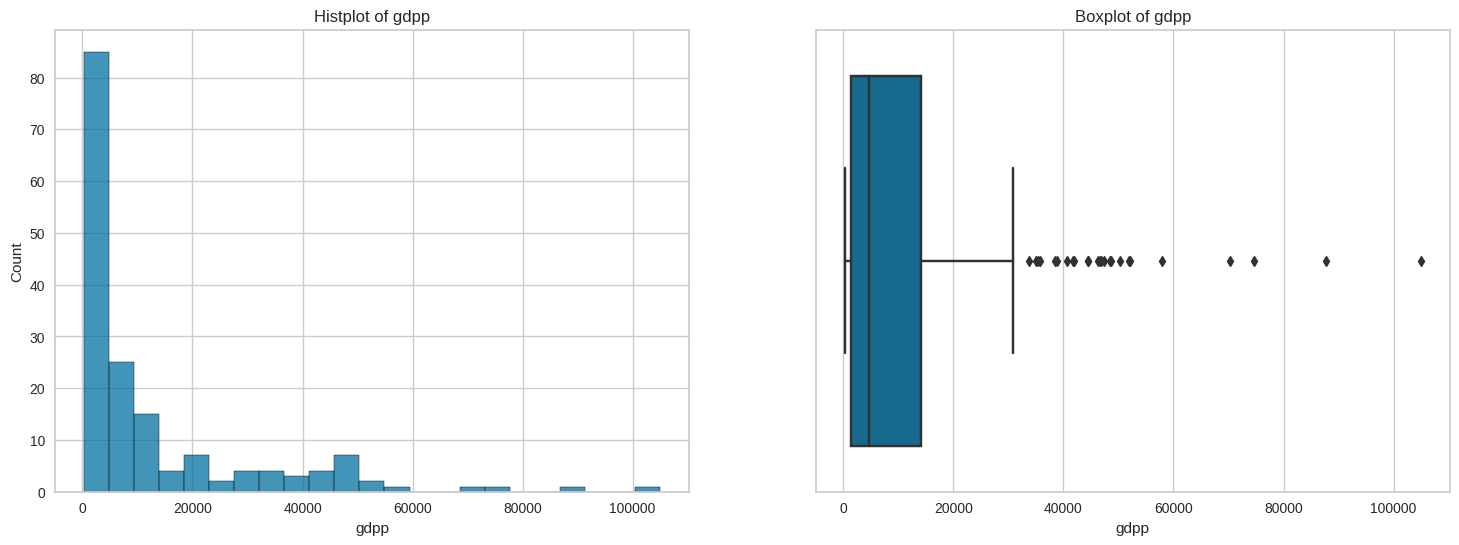

In [574]:
    i=8
    describeColumn(df,i+1)
    graphs[columns[i]]

In [575]:
df[df['gdpp'] >=30000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800


Países de 1º mundo ou relacionados a indústria petrolífica.

# Correlação

In [576]:
df1 = df.drop(['country'], axis=1)
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


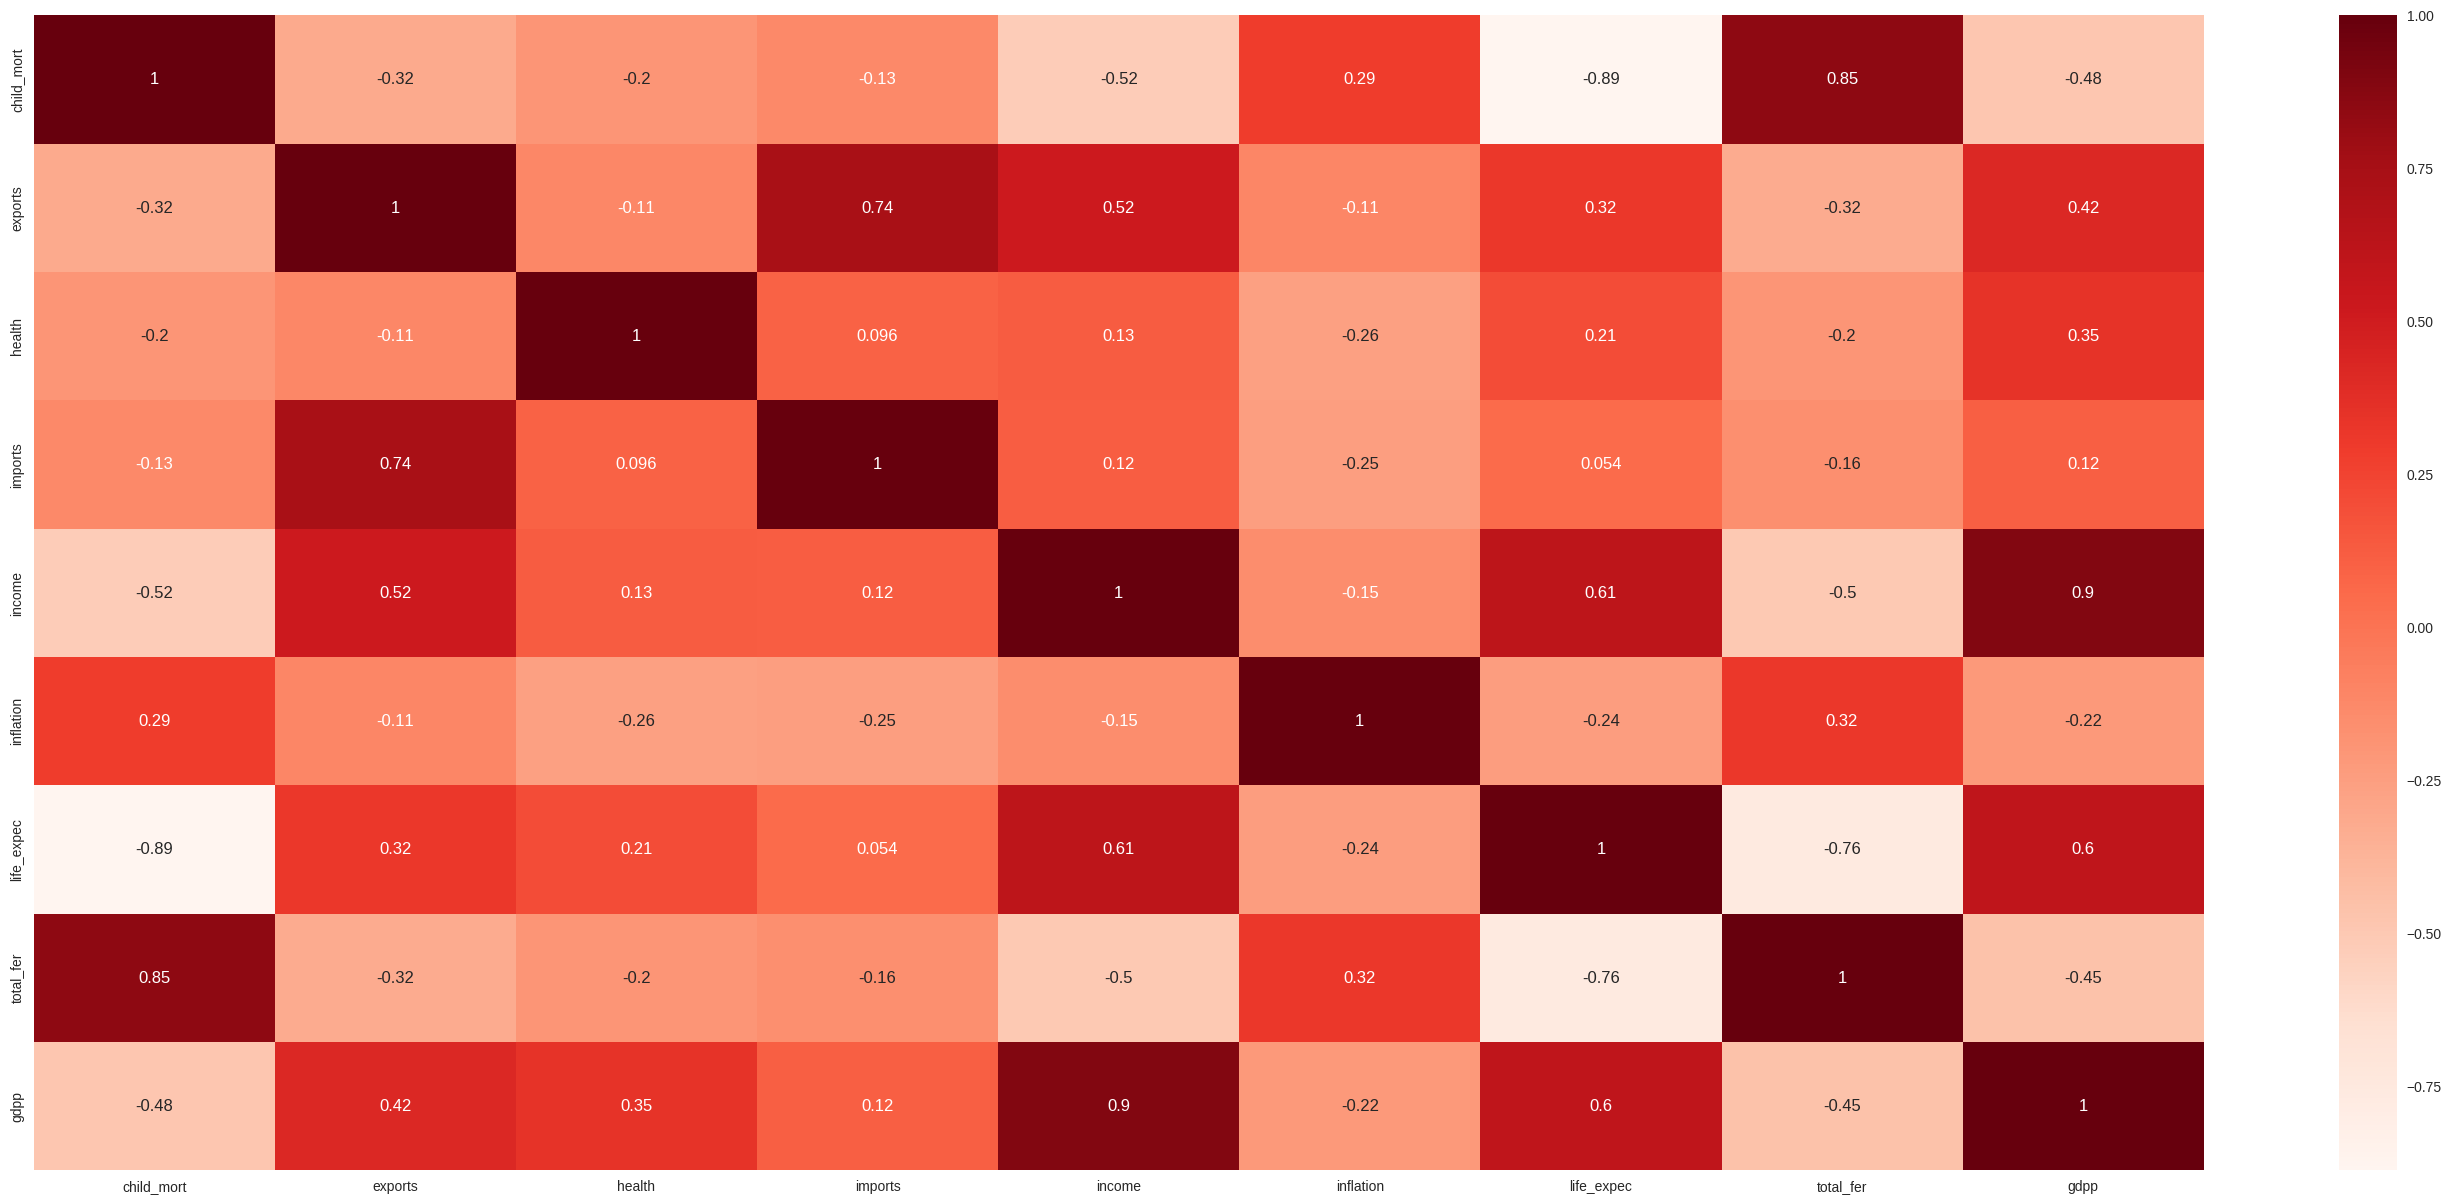

In [577]:
plt.figure(figsize=(35,15))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Normalização dos Dados

In [578]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns) 
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


# Baseline 

## Kmeans


In [579]:
def plot_kmeans(cluster_centers, y_km,X):
  # plot
  plt.figure(figsize=(10, 10))
  plt.scatter(
      X[y_km == 0, 0], X[y_km == 0, 1],
      s=50, c='lightgreen',
      marker='s', edgecolor='black',
      label='cluster 1'
  )
  plt.scatter(
      X[y_km == 1, 0], X[y_km == 1, 1],
      s=50, c='orange',
      marker='o', edgecolor='black',
      label='cluster 2'
  )
  plt.scatter(
      X[y_km == 2, 0], X[y_km == 2, 1],
      s=50, c='lightblue',
      marker='v', edgecolor='black',
      label='cluster 3'
  )
  plt.scatter(
      cluster_centers[:, 0], cluster_centers[:, 1],
      s=250, marker='*',
      c='red', edgecolor='black',
      label='centroids'
  )
  plt.legend(scatterpoints=1)
  plt.grid()
  plt.show()

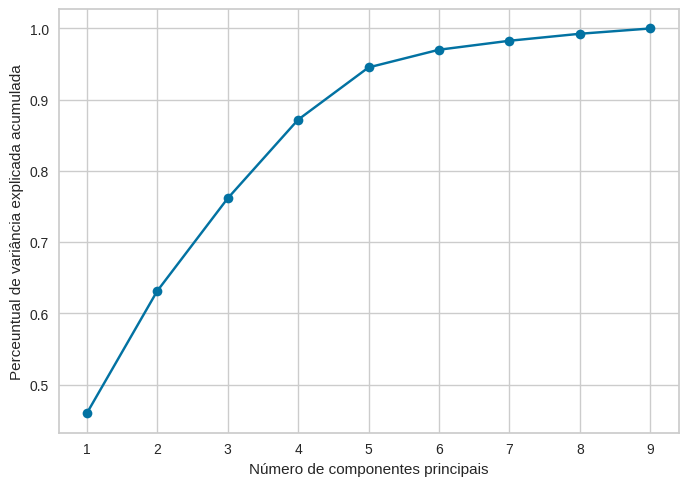

In [580]:
#Análise de componentes principais
pca = PCA()
pca.fit(df_scaled)

variancia_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)


fig, ax = plt.subplots()
eixo_x = list(range(1, len(variancia_explicada_acumulada)+1))
ax.plot(eixo_x, variancia_explicada_acumulada, marker="o")
ax.set_xlabel("Número de componentes principais")
ax.set_ylabel("Perceuntual de variância explicada acumulada")
ax.set_xticks(eixo_x)
plt.show()

In [581]:
#Cria o novo dataset com os componentes selecionados
pca = PCA(n_components=5)
df_scaled2 = pca.fit_transform(df_scaled)

pd.DataFrame(df_scaled2)

,0,1,2,3,4
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581
164,0.498524,1.390744,-0.238526,-1.074098,1.176081
165,-1.887451,-0.109453,1.109752,0.056257,0.618365


o que nós encontramos numa primeiro agrupamento com o dataset sem nenhum tratamento anterior. 





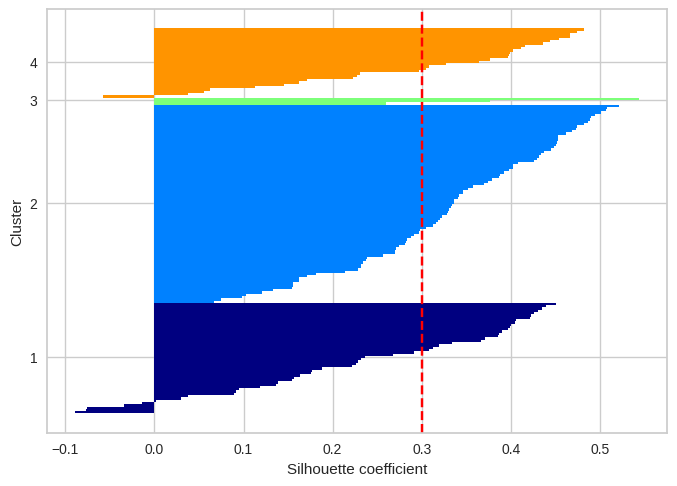

In [582]:
#Executa o kmeans com todas as colunas
km = KMeans(
    n_clusters=4, 
    init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=69
)
df_kmeans = km.fit_predict(df_scaled)
silhouette(df_scaled, df_kmeans)

<Axes: >

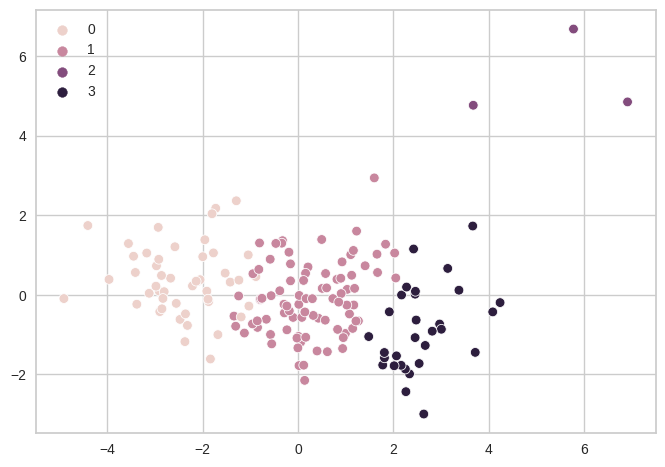

In [583]:
#Visualiza a partição
sns.scatterplot(x=df_scaled2[:,0], y=df_scaled2[:,1], hue=df_kmeans)

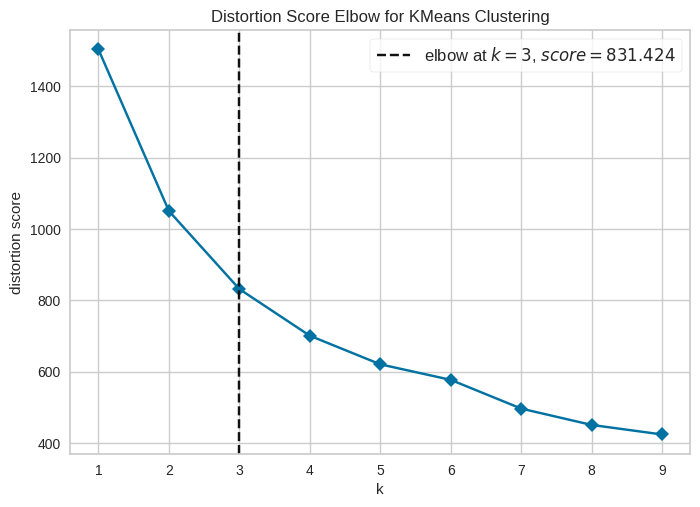

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [584]:
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(km, k=(1,10), metric='distortion', timings=False)

# Fit the data and visualize
visualizer.fit(df_scaled)    # o resultado pro scaled2 é o mesmo
visualizer.poof() 

Foi tentado com clusters de 2 a 4, sendo que 4 pareceu o melhor pelas silhuetas, apesar de possuir valores negativos. Com clusters = 2 não temos valores negativos, porém com 4 as silhuetas ficam mais esbeltas e uniformes, possuindo uma média levemente maior.

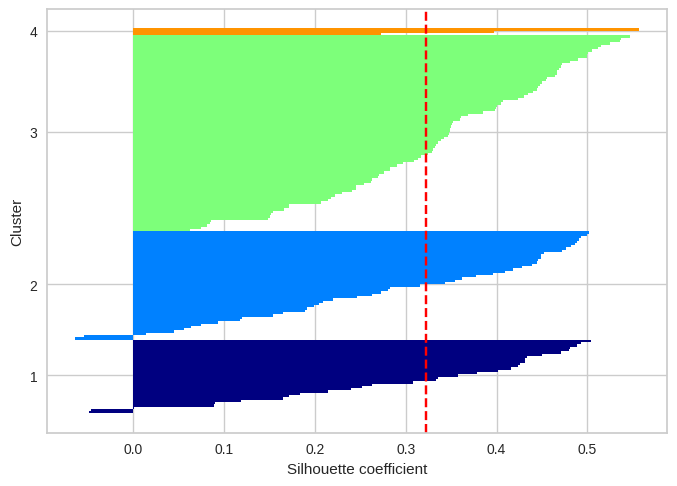

In [585]:
#Analisa o agrupamento com os novos dados

km = KMeans(
    n_clusters=4, 
    init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=69
)


df_kmeans2 = km.fit_predict(df_scaled2)
silhouette(df_scaled2, df_kmeans2)

Foi tentado com valores de 2 a 6, sendo 2 e 4 os que apresentaram maior organização, apesar de um dos grupos realmente ser menor que os demais.

<Axes: >

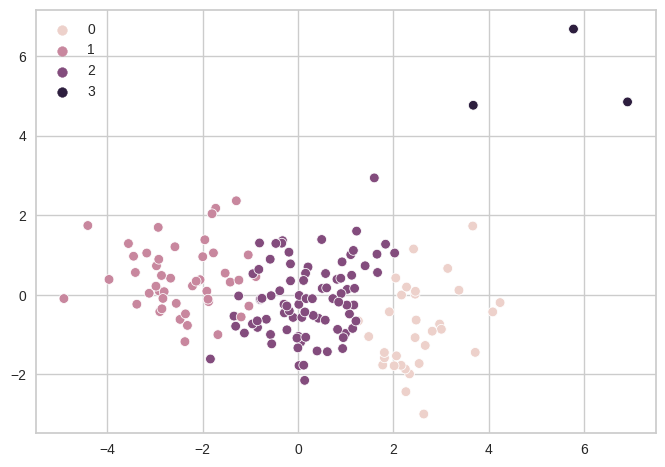

In [586]:
#Visualiza a partição
sns.scatterplot(x=df_scaled2[:,0], y=df_scaled2[:,1], hue=df_kmeans2)

### Elbow point

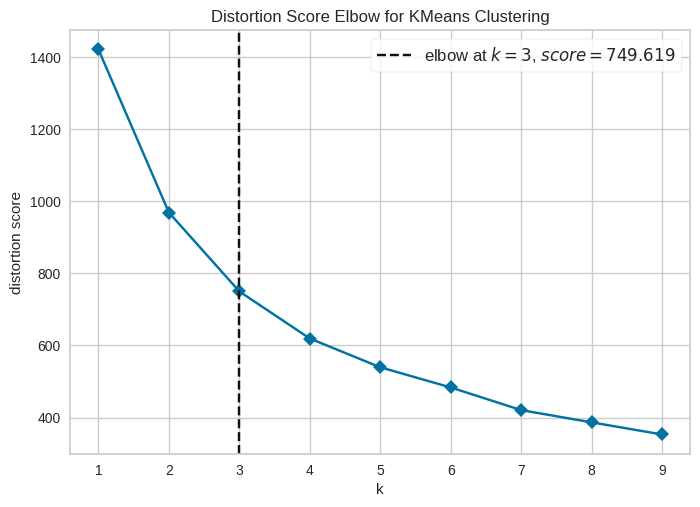

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [587]:
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(km, k=(1,10), metric='distortion', timings=False)

# Fit the data and visualize
visualizer.fit(df_scaled2)    # o resultado pro scaled2 é o mesmo
visualizer.poof() 

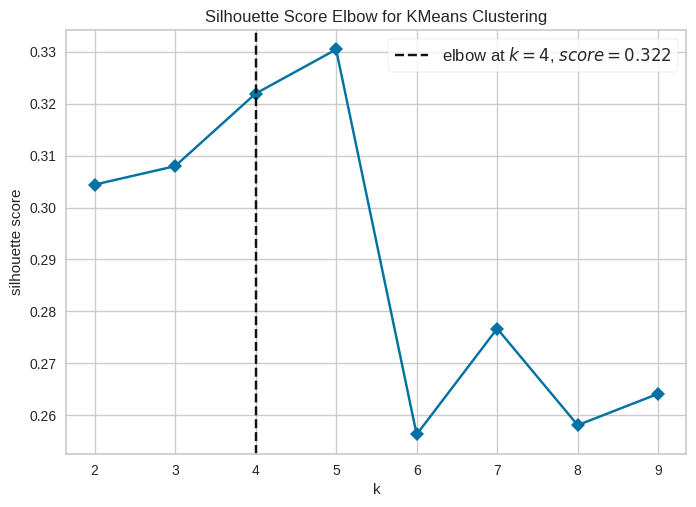

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [588]:
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(km, k=(2,10), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(df_scaled2)    # o resultado pro scaled2 é o mesmo
visualizer.poof() 

Vemos que os pontos 3 e 4 são os pontos "cutuvelo" da curva. Apesar do método identificar o ponto 3 como o cutuvelo (distorcion), é possível ver que não há uma diferença gritante entre ele e o ponto 4. Como a silhueta ficou mais bem organzida com 4 e este é o ponto de cutuvelo para 'silhouette', iremos seguir com 4.

# H - Clustering

## Dendograma

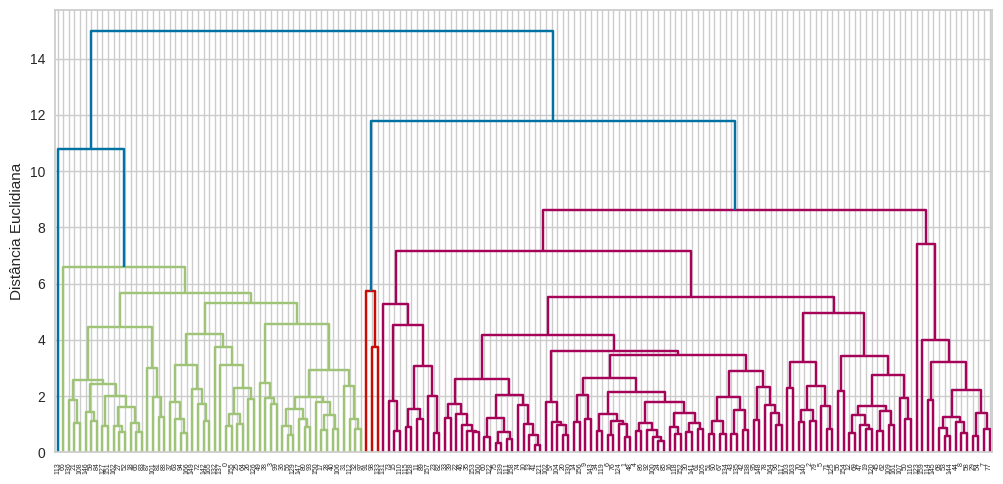

In [589]:
row_clusters2 = linkage(df_scaled, method='complete', metric='euclidean')
# plot dendrogram
plt.figure(figsize=(10, 5))
row_dendr = dendrogram(row_clusters2)

plt.tight_layout()
plt.ylabel('Distância Euclidiana')
plt.show()

A Partir do dendograma abaixo podemos inferir que existem 2 grupos bem definidos para k=2

Contudo, ao aprofundarmos no para valores maiores de K, vimos que existem 2 grupos que apresentam características importantes de se observar (o ponto único mais à esquerda e o grupo vermelho, que possui características que fazem com que ele seja distinto do grupo roxo).

Levanta-se a hipótese de que esses dois grupos podem apresentar características que façam valer sua análise independente.

Apesar disso, como o grupo azul inicialmente possui apenas 1 ponto, ele pode ser incluído no grupo verde, que é o que mais se aproxima deste. Logo teremos um total de 3 grupos identificados.

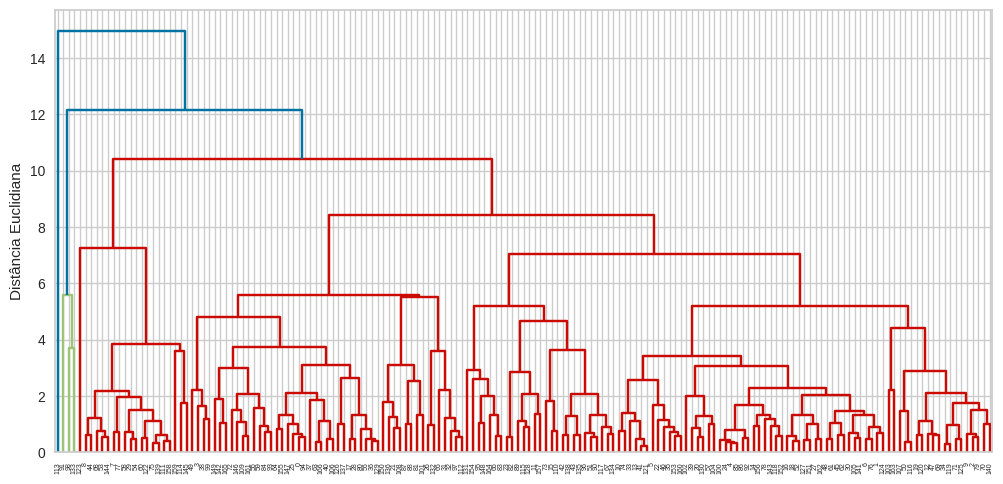

In [590]:
row_clusters2 = linkage(df_scaled2, method='complete', metric='euclidean')
# plot dendrogram
plt.figure(figsize=(10, 5))
row_dendr = dendrogram(row_clusters2)

plt.tight_layout()
plt.ylabel('Distância Euclidiana')
plt.show()

Com a utilziação do PCA podemos ver que houve uma baixa performance utilizando 'complete'.

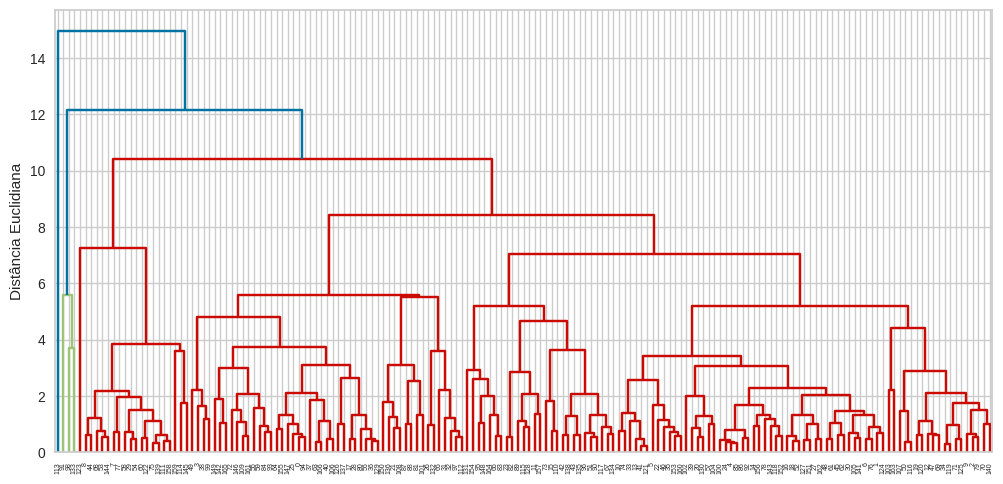

In [591]:
mrow_clusters2 = linkage(df_scaled, method='single', metric='euclidean')
# plot dendrogram
plt.figure(figsize=(10, 5))
row_dendr = dendrogram(row_clusters2)

plt.tight_layout()
plt.ylabel('Distância Euclidiana')
plt.show()

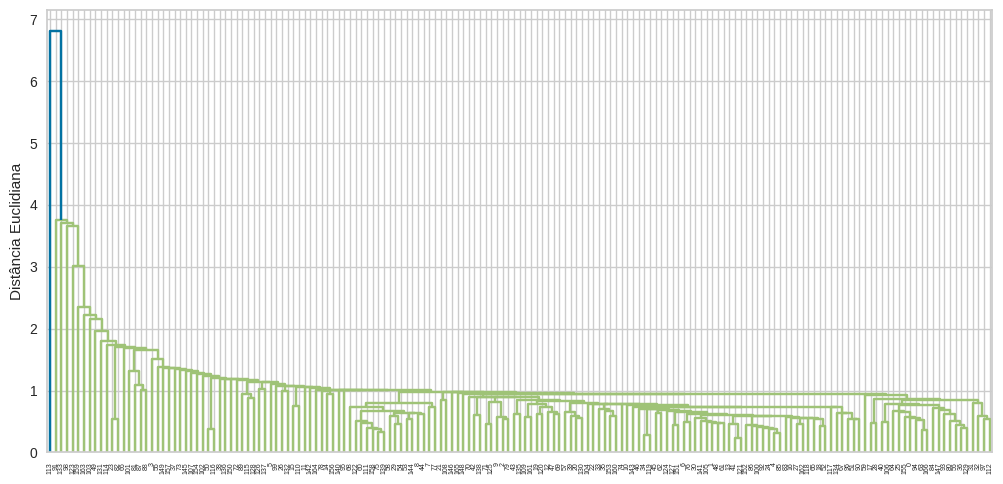

In [592]:
row_clusters2 = linkage(df_scaled2, method='single', metric='euclidean')
# plot dendrogram
plt.figure(figsize=(10, 5))
row_dendr = dendrogram(row_clusters2)

plt.tight_layout()
plt.ylabel('Distância Euclidiana')
plt.show()

Vemos que com o método single não obtivemos bons resultados.

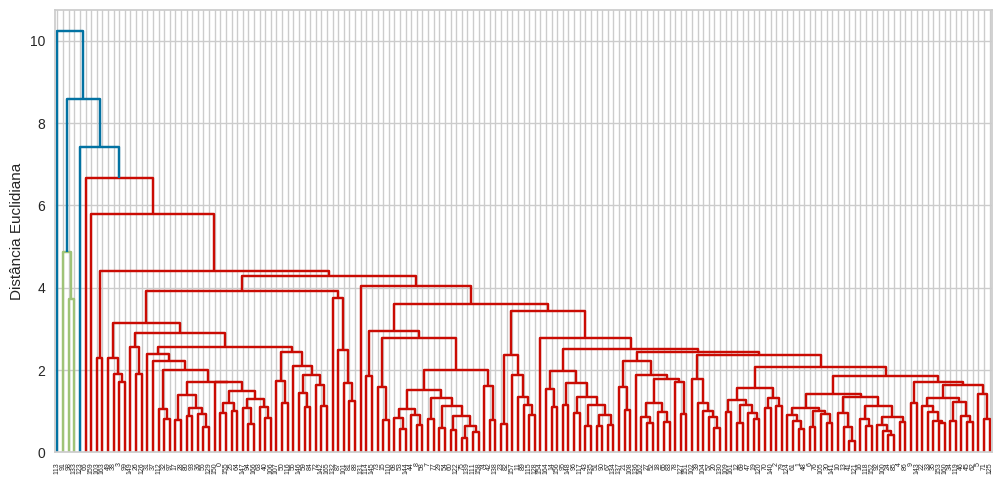

In [593]:
row_clusters2 = linkage(df_scaled, method='average', metric='euclidean')
# plot dendrogram
plt.figure(figsize=(10, 5))
row_dendr = dendrogram(row_clusters2)

plt.tight_layout()
plt.ylabel('Distância Euclidiana')
plt.show()

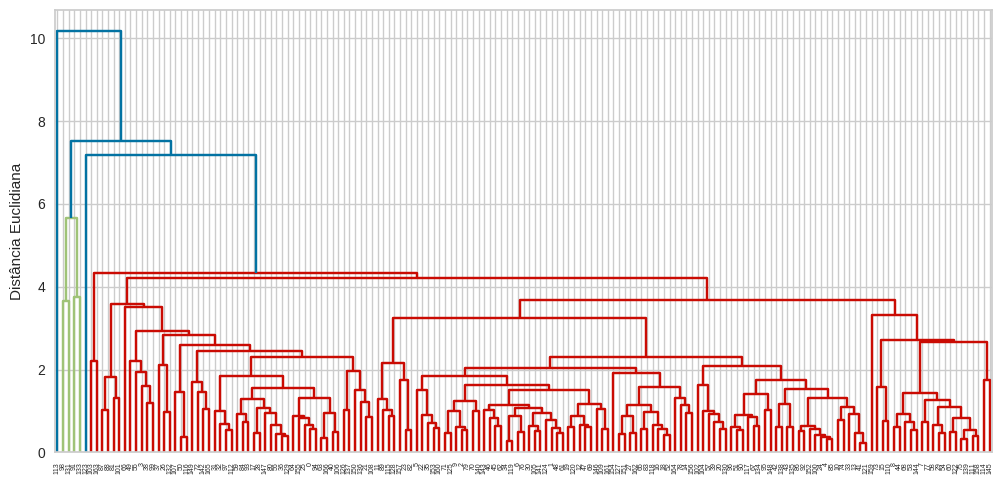

In [594]:
row_clusters2 = linkage(df_scaled2, method='average', metric='euclidean')
# plot dendrogram
plt.figure(figsize=(10, 5))
row_dendr = dendrogram(row_clusters2)

plt.tight_layout()
plt.ylabel('Distância Euclidiana')
plt.show()

O modelo de utilizando 'average' também não obteve bons resultados

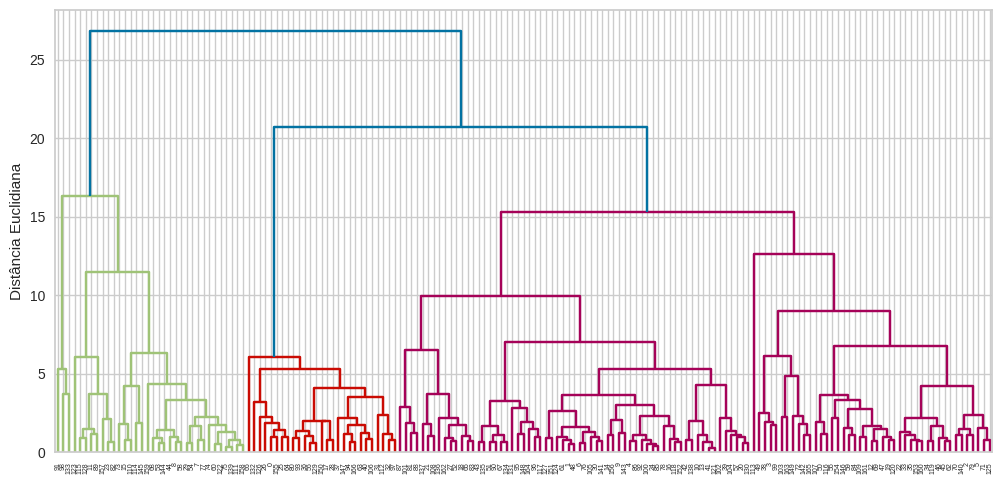

In [595]:
row_clusters2 = linkage(df_scaled, method='ward', metric='euclidean')
# plot dendrogram
plt.figure(figsize=(10, 5))
row_dendr = dendrogram(row_clusters2)

plt.tight_layout()
plt.ylabel('Distância Euclidiana')
plt.show()

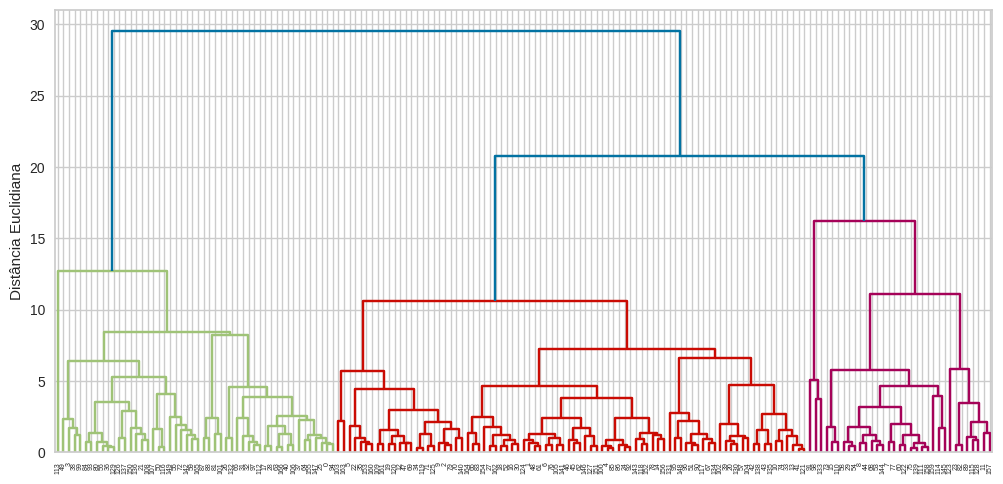

In [596]:
row_clusters2 = linkage(df_scaled2, method='ward', metric='euclidean')
# plot dendrogram
plt.figure(figsize=(10, 5))
row_dendr = dendrogram(row_clusters2)

plt.tight_layout()
plt.ylabel('Distância Euclidiana')
plt.show()

Vemos claramente com o método ward 3-4 grupos distintos, sendo que os dois últimos possuem mais similaridade que os demais, podendo ser agregado em apenas um. Este parece ser o melhor dos 4 métodos utilizados. Selecionaremos 3 como o ponto de decisão, já que caso selecionarmos 4, o grupo VERDE será partido em dois, gerando um grupo com apenas 3 pontos. 

## Classificando

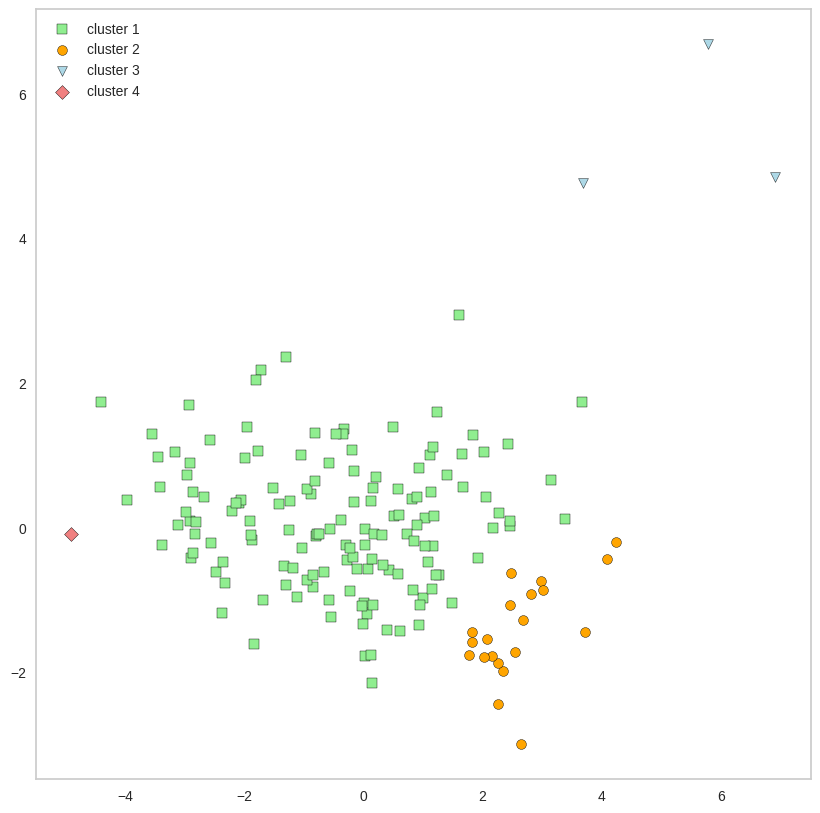

In [597]:
# Agrupamentos com k=4 e linkage = "complete"
plot_histogram_hclust(df_scaled2,4,'complete')

Para definir num primeiro momento o numero de clusters para esse método, traça-se a linha no numero que visualmente faz sentido no dendograma. A conclusão de que 4 clusters seriam o resultado mais consistente, contudo, dois dos grupos identificados apresentam o número de entradas baixo. 

A linkage do tipo completa foi utilizada após tentativa e erro com os outros métodos, porem foi o que apresentou o resultado mais visualmente coezo. Nota-se que as zonas de cofusão do cluster 4 é notória, sendo possível até que sejam outliers do grupo 2, enquanto o grupo 3 é ali o mais distante do conjunto.


Obeservações relevantes:
* o grupo 4 realmente se caracteiza de apenas um ponto, não fazendo sentido analizá-lo separadamente, podendo agregá-lo ao grupo 2.


Revisando os dados, parece ter mais sentido tratarmos apenas os 2 grupos hierárquicos, a título de classficar os países para o desafio solicitado.

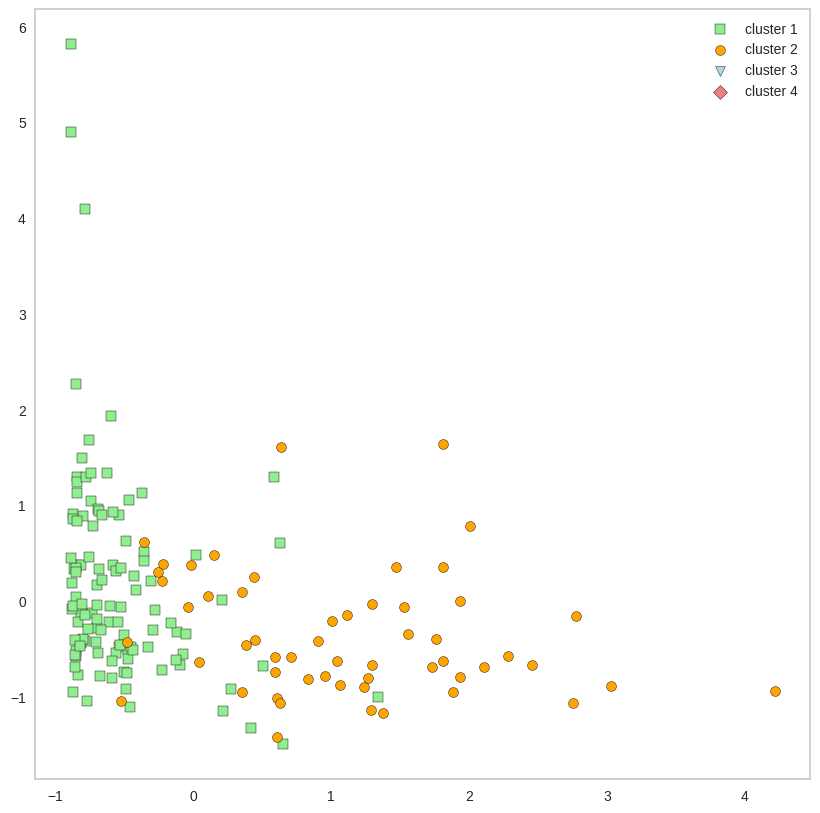

In [598]:
plot_histogram_hclust(df_scaled,2,'complete')

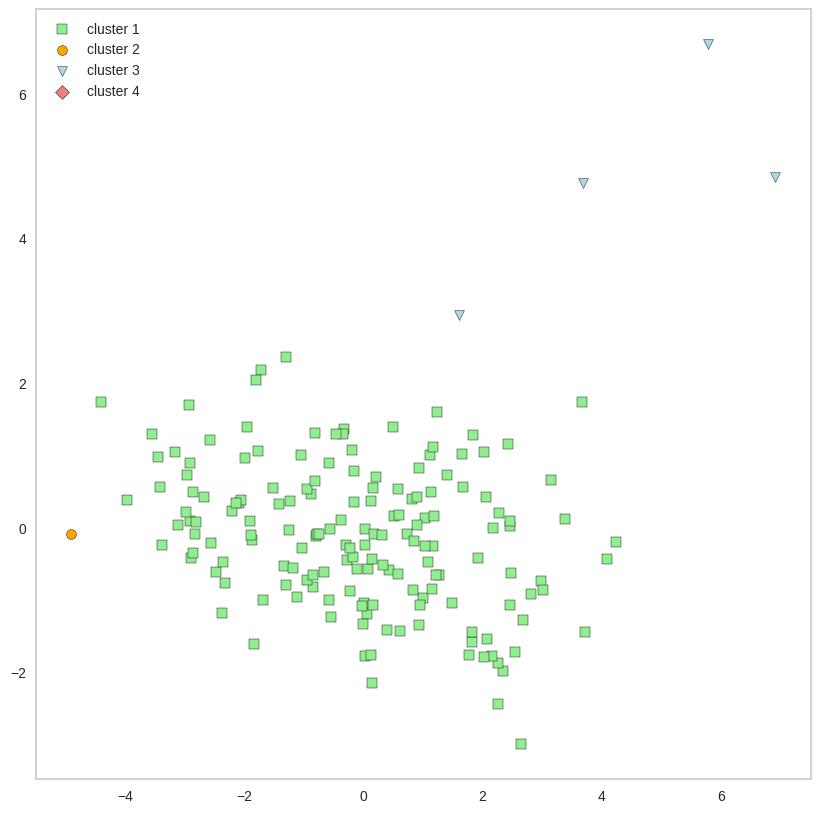

In [599]:
plot_histogram_hclust(df_scaled2,3,'average')

Vemos que com o método average podemos claramente identificar os pontos superiores e os pontos inferiores, porém continuamos tendo o mesmo problema do grupo unitário.

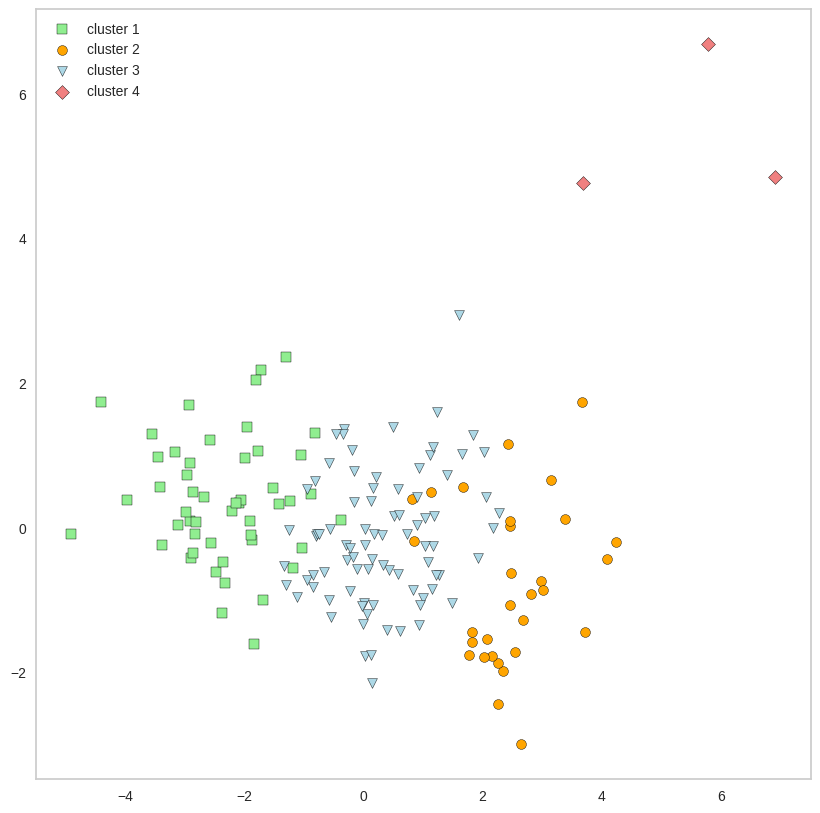

In [600]:
plot_histogram_hclust(df_scaled2,4,'ward')

Podemos ver claramente utilizando o WARD 3 grupos que possuem uma alta área de confusão, mas ainda sim possuem uma lógica visual distinta entre eles. Além disso, os três pontos superiores esquerdos foram agregados em um grupo maior, o que é positivo, já que não há muito valor em um grupo com apenas 3 indivíduos.

# DBSCAN

<Axes: xlabel='first', ylabel='second'>

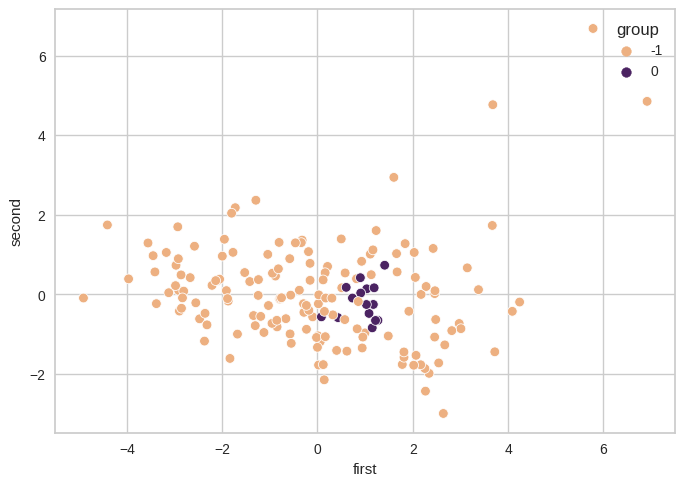

In [601]:
# initialize and fit DBSCAN
db = DBSCAN(eps=1, min_samples=10, metric='euclidean')

X = np.array(df_scaled) 
y_db = db.fit_predict(X)

plot_df = pd.DataFrame(df_scaled2, columns=["first","second","2","3","4"]) # Utilizando o PCA para visualização
plot_df["group"] = y_db
sns.scatterplot(data=plot_df, x="first", y="second",hue="group",palette="flare")



<Axes: xlabel='first', ylabel='second'>

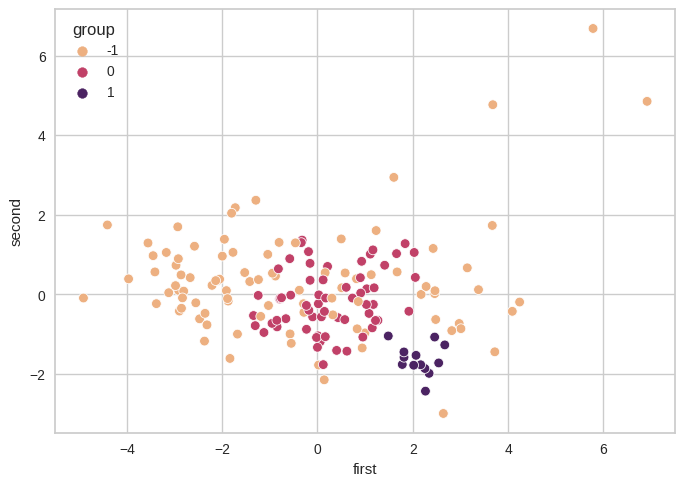

In [602]:
# initialize and fit DBSCAN
db = DBSCAN(eps=1, min_samples=10, metric='euclidean')

X = np.array(df_scaled2) 
y_db = db.fit_predict(X)

plot_df = pd.DataFrame(df_scaled2, columns=["first","second","2","3","4"])
plot_df["group"] = y_db
sns.scatterplot(data=plot_df, x="first", y="second",hue="group",palette="flare")



Foi tentado todos os valores de eps = 0.1 a 1 para min_samples = 3, 5, 10. Nenhum caso obteve uma separação visual coerente. eps=1 e min_samples = 10 foi o caso com melhor resultado visual.



# Conclusões

Considerando todos os modelos analizados, podemos ver que o método de H-cluster com 'ward' possui o melhor modelo para k=3. Iremos seguir as análises posteriores com este.

In [603]:
ac = AgglomerativeClustering(
            n_clusters=3, affinity='euclidean', linkage='ward'
    )
df_hc = ac.fit_predict(df_scaled2)

In [604]:
df_grouped = df.copy()

In [605]:
df_grouped["group"] = df_hc

In [606]:
df_grouped.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2


Podemos notar que o grupo 0 deve indicar os países mais desenvolvidos (Australia e Austria). O grupo 1 e o grupo dois já se misturam mais e é necessário analisar suas variáveis para maior diferenciação.

In [607]:
df_grouped.groupby("group").count()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
group,,,,,,,,,,
0,33,33,33,33,33,33,33,33,33,33
1,50,50,50,50,50,50,50,50,50,50
2,84,84,84,84,84,84,84,84,84,84


O grupo 0 indica 33 países que podem ser excluidos da escolha, caso a hipiotese acima se confirme. 

In [608]:
def describe_group(df_grouped,df=df):
    foo = pd.DataFrame()
    for column in df.columns:
        print("******************************************************************************")
        print("")
        print("column: "+column)
        print("")
        print(df_grouped.groupby("group")[column].describe())
        print("******************************************************************************")
describe_group(df_grouped)

******************************************************************************

column: country

      count unique          top freq
group                               
0        33     33    Australia    1
1        50     50  Afghanistan    1
2        84     84      Albania    1
******************************************************************************
******************************************************************************

column: child_mort

       count       mean        std   min     25%    50%    75%    max
group                                                                
0       33.0   6.003030   3.604293   2.6   3.900   4.50    7.3   16.6
1       50.0  90.034000  34.593515  28.1  63.625  88.75  111.0  208.0
2       84.0  20.134524  13.430145   3.2  10.300  17.40   26.2   62.0
******************************************************************************
******************************************************************************

column: exports

       count 

Pelos valores, podemos identificar que o grupo 1 possui piores estatísticas que os demais. 

Pontos específicos:
1. Vemos que 'Health' não foi um balizador considerado por este agrupamento, já que a média, min e max são próximos em todos os 3 grupos.


Apesar de child_mort ter alta correlação (maior ou igual à que 85%), consideramos que não é necessário retirar essas colunas pois a aplicação do PCA no agrupamento irá retirar a depenência dessas duas colunas.

## Reanálise do grupo 1

In [609]:
df_1 = df_grouped[df_grouped["group"]==1]

In [610]:
def normalizator(df_1):
    df1_1 = df_1.drop(['country'], axis=1)
    scaler = StandardScaler()
    df_scaled_group_1 = pd.DataFrame(scaler.fit_transform(df1_1), columns = df1_1.columns) 
    #Análise de componentes principais
    pca = PCA()
    pca.fit(df_scaled_group_1)

    variancia_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)


    fig, ax = plt.subplots()
    eixo_x = list(range(1, len(variancia_explicada_acumulada)+1))
    ax.plot(eixo_x, variancia_explicada_acumulada, marker="o")
    ax.set_xlabel("Número de componentes principais")
    ax.set_ylabel("Perceuntual de variância explicada acumulada")
    ax.set_xticks(eixo_x)
    plt.show()
    return df_scaled_group_1

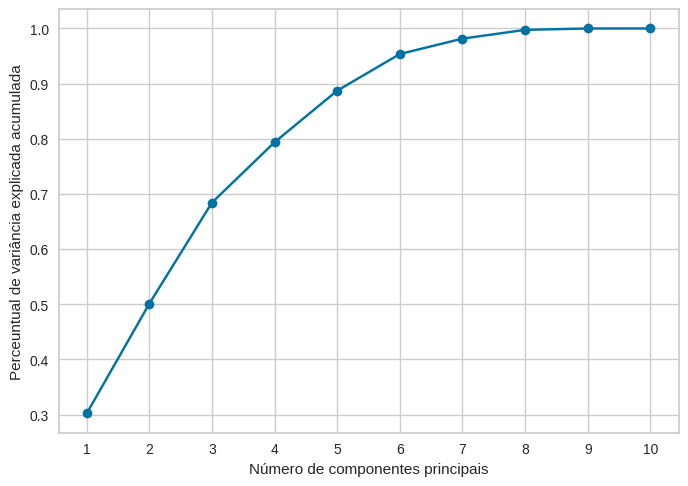

In [611]:

df_scaled_group_1 = normalizator(df_1)

Rodando o PCA novamente já que as características mais relevantes deste subgrupo é diferente das caracteristicas mais relevantes do grupo original


In [612]:
#Cria o novo dataset com os componentes selecionados
def apply_pca(df_scaled_group_1,n_components=7):
    pca = PCA(n_components=n_components)
    df_scaled2_group_1 = pca.fit_transform(df_scaled_group_1)
    return df_scaled2_group_1

In [613]:

df_scaled2_group_1 = apply_pca(df_scaled_group_1)

In [614]:
def dendrogramator(df_scaled2_group_1):
    row_clusters2_group_1 = linkage(df_scaled2_group_1, method='ward', metric='euclidean')
    # plot dendrogram
    plt.figure(figsize=(10, 5))
    row_dendr = dendrogram(row_clusters2_group_1)

    plt.tight_layout()
    plt.ylabel('Distância Euclidiana')
    plt.show()

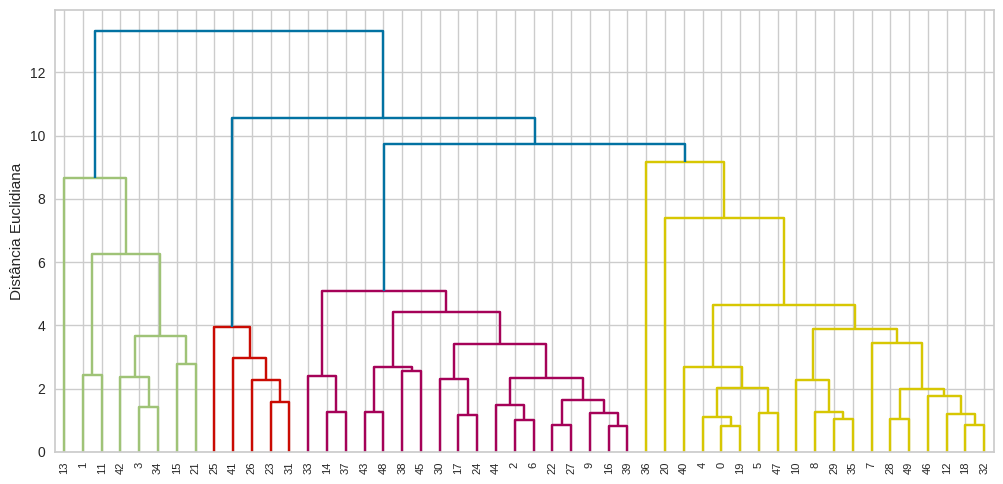

In [615]:

dendrogramator(df_scaled2_group_1)

Podemos notar claramente 4 grupos distintos.

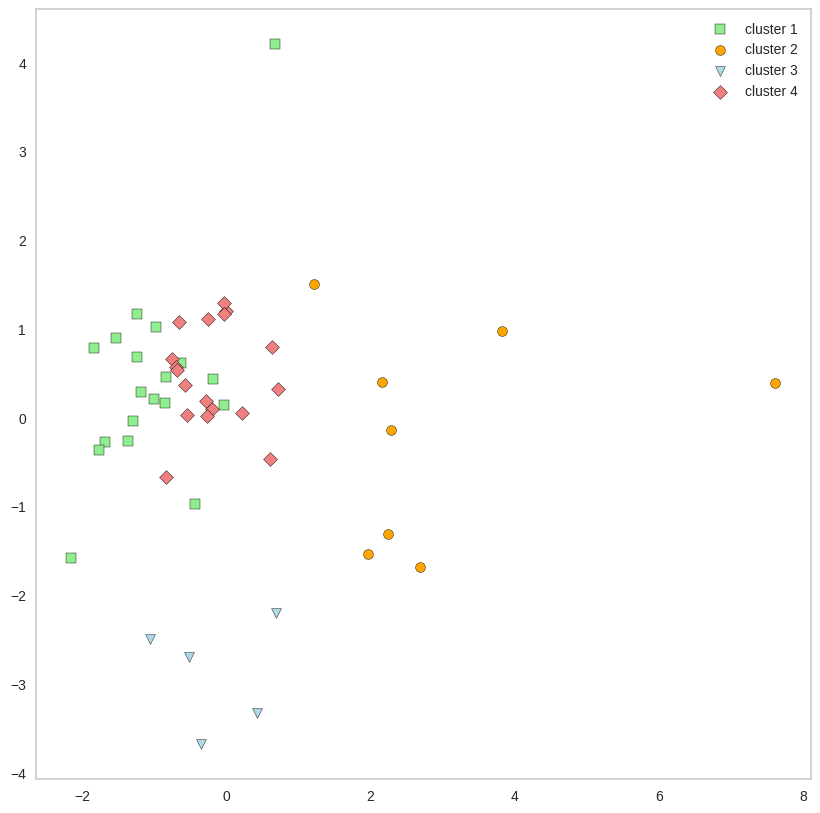

In [616]:

plot_histogram_hclust(df_scaled2_group_1,4,'ward')

In [617]:
ac = AgglomerativeClustering(
            n_clusters=4, affinity='euclidean', linkage='ward'
    )
df_hc_group_1 = ac.fit_predict(df_scaled2_group_1)

In [618]:
df_group_1 = df_1.copy()

In [619]:
df_group_1["group"]=df_hc_group_1

In [620]:
describe_group(df_group_1)

******************************************************************************

column: country

      count unique          top freq
group                               
0        19     19  Afghanistan    1
1         8      8       Angola    1
2         5      5     Kiribati    1
3        18     18        Benin    1
******************************************************************************
******************************************************************************

column: child_mort

       count        mean        std   min    25%     50%      75%    max
group                                                                   
0       19.0  118.563158  31.880614  81.0  92.05  114.00  133.500  208.0
1        8.0   69.587500  29.328408  36.9  53.40   59.85   75.675  119.0
2        5.0   63.960000  30.745211  28.1  40.00   62.70   89.300   99.7
3       18.0   76.250000  17.001566  55.2  62.85   73.30   86.225  111.0
****************************************************************

O agrupamento expressou uma divisão excessiva em algumas das variáveis, a predominância do grupo 0 como o pior entre as variáveis existes é notória.

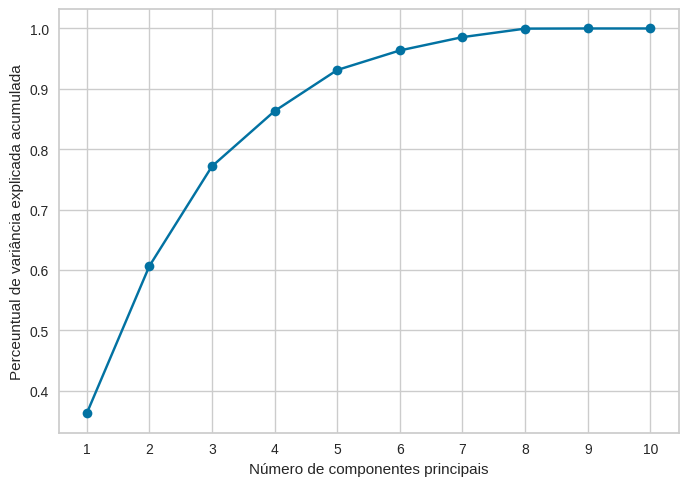

In [621]:
df_1_0 = df_group_1[df_group_1["group"]==0]

df_scaled_group_1_0 = normalizator(df_1_0)

In [622]:

df_scaled2_group_1_0 = apply_pca(df_scaled_group_1_0)

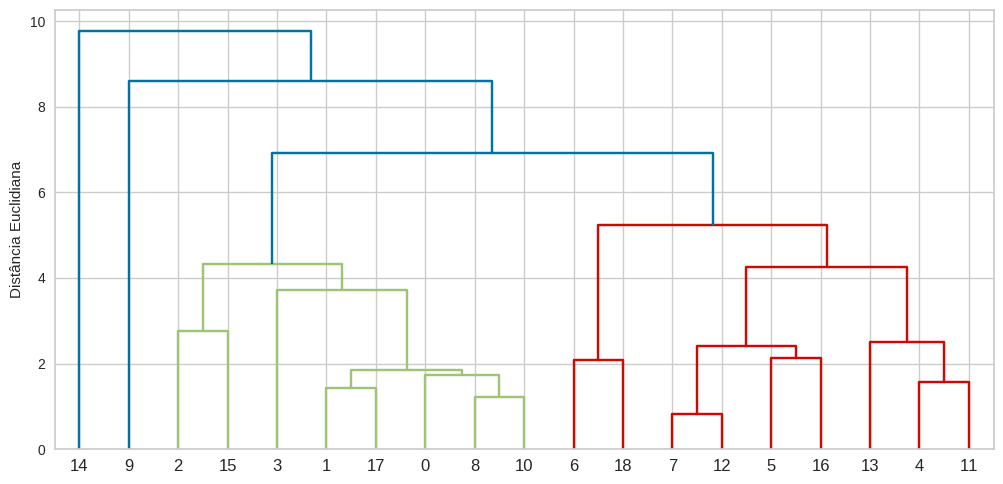

In [623]:

dendrogramator(df_scaled2_group_1_0)


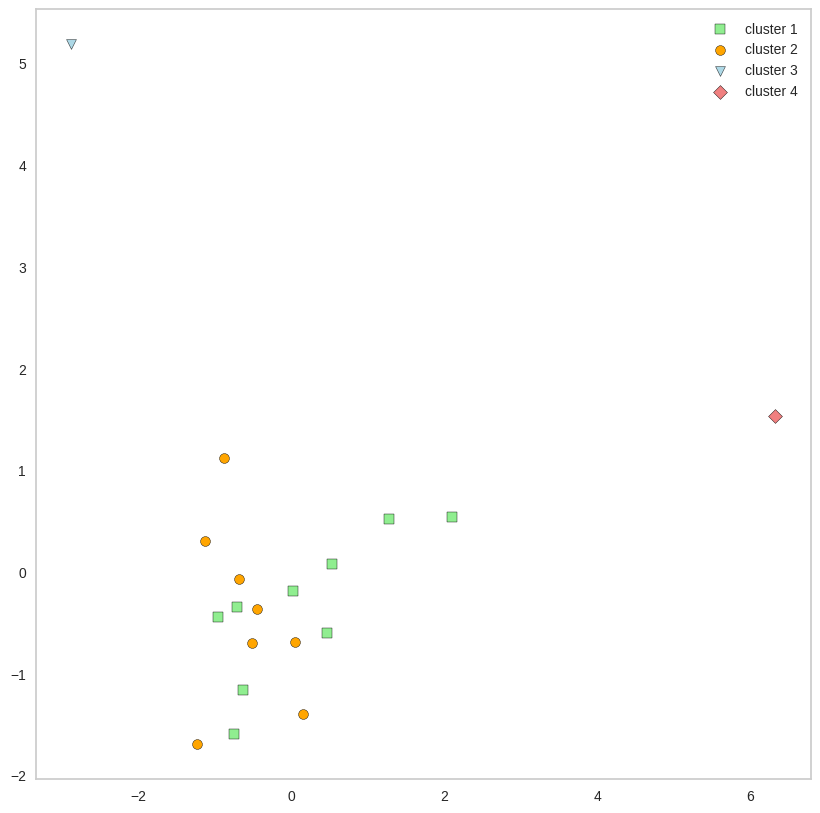

In [624]:
plot_histogram_hclust(df_scaled2_group_1_0,4,'ward')

In [625]:
ac = AgglomerativeClustering(
            n_clusters=4, affinity='euclidean', linkage='ward'
    )
df_hc_group_1_0 = ac.fit_predict(df_scaled2_group_1_0)

In [626]:
df_group_1_0 = df_1_0.copy()
df_group_1_0["group"]=df_hc_group_1_0
describe_group(df_group_1_0)

******************************************************************************

column: country

      count unique          top freq
group                               
0         9      9         Chad    1
1         8      8  Afghanistan    1
2         1      1        Haiti    1
3         1      1      Nigeria    1
******************************************************************************
******************************************************************************

column: child_mort

       count        mean        std    min      25%    50%     75%    max
group                                                                    
0        9.0  113.377778  21.289715   83.1  101.000  111.0  123.00  150.0
1        8.0  111.787500  29.104955   81.0   90.425  103.8  124.25  160.0
2        1.0  208.000000        NaN  208.0  208.000  208.0  208.00  208.0
3        1.0  130.000000        NaN  130.0  130.000  130.0  130.00  130.0
**********************************************************

Com essa análise podemos notar que o Haiti, o país único do grupo 2, está com condições péssimas, logo deve necessitar de ajuda humanitária. Enquanto isso, o grupo 3 (Nigéria), apesar de ser agrupádo separadamente, parece não estar em condições tão ruins quanto os demais.

Dentre o grupo 0 e 1 ambos possuem métricas ruins e parecidas, apesar da média do grupo 1 ser levemente pior. Iremos selecionar manualmente dentro dessas duas categorias.

In [627]:
df_group_1_0[(df_group_1_0["group"] == 0)|(df_group_1_0["group"] == 1)].sort_values(by="child_mort", ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.39,56.5,6.59,897,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1
97,Mali,137.0,22.80,4.98,35.1,1870,4.37,59.5,6.55,708,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.81,57.9,5.87,575,1
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547,1
40,Cote d'Ivoire,111.0,50.60,5.30,43.3,2690,5.39,56.3,5.27,1220,0
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,0


Selecionamos: 
1. Sierra Leone - mortalidade infantil alta e gdpp baixo + inflação alta.
2. Central African Republic	- mortalidade infantil, gdpp baixo, expectativa de vida baixa, health baixo.
3. Burundi - gdpp baixo (menor), inflação alta
4. Congo, Dem. Rep.	- gdpp baixo, inflação alta, mortalidade infantil acima da média.

3 destes foram do grupo 1 e apenas 1 do grupo 1.

Perguntas finais para a gente poder concluir o trabalho:

analisar os grupos encontrados e selecionar 5 países que mais precisam de ajuda internacional
* Identificar os grupos 
* Entender quais são as características principais de cada grupo, e quais os atributos que foram levados em consideração na prática
* A partir do entendimento dos atributos, ordenar dentro do grupo que precisa de AJUDA quais os 5 mais críticos e porquê


Levando em conta os atribuitos acima, os cinco países que precisam mais de ajuda são:

1. Haiti - Situação crítica.
2. Sierra Leone - mortalidade infantil alta e gdpp baixo + inflação alta.
3. Central African Republic	- mortalidade infantil, gdpp baixo, expectativa de vida baixa, health baixo.
4. Burundi - gdpp baixo (menor), inflação alta
5. Congo, Dem. Rep.	- gdpp baixo, inflação alta, mortalidade infantil acima da média.
